In [1]:
import pandas as pd
import re
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import pgeocode

# Einlesen der Daten


In [2]:
df = pd.read_csv("../data/immo_data_202208_v2.csv", low_memory=False)
df.drop(["Unnamed: 0.1","Unnamed: 0"], axis=1,inplace=True) #Zwei Spalten für Index entfernen
df.head()

Municipality Living space Plot area Floor space Availability  \
0   Biberstein       100 m²       NaN         NaN   On request   
1   Biberstein       156 m²    222 m²      242 m²   On request   
2          NaN          NaN       NaN         NaN          NaN   
3   Biberstein       154 m²    370 m²      257 m²   On request   
4     Küttigen       142 m²       NaN         NaN   On request   

                                location  \
0                    5023 Biberstein, AG   
1   Buhldenstrasse 8d5023 Biberstein, AG   
2                       5022 Rombach, AG   
3  Buhaldenstrasse 8A5023 Biberstein, AG   
4                       5022 Rombach, AG   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   
2  2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...   
3  4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...   
4  4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...   

                                detailed_description  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...   
1  DescriptionStilvolle Liegenschaft an ruhiger L...   
2  detail_responsive#description_title2,5 Zimmerw...   
3  DescriptionDieses äusserst grosszügige Minergi...   
4  DescriptionAus ehemals zwei Wohnungen wurde ei...   

                                                 url  \
0  https://www.immoscout24.ch//en/d/penthouse-buy...   
1  https://www.immoscout24.ch//en/d/terrace-house...   
2  https://www.immoscout24.ch//en/d/penthouse-buy...   
3  https://www.immoscout24.ch//en/d/detached-hous...   
4  https://www.immoscout24.ch//en/d/flat-buy-romb...   

                                               table  ... features  \
0  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
1  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
2  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
3  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
4  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   

  description_detailed Floor space: Number of floors: Volume:     plz  \
0                  NaN          NaN               NaN     NaN  5023.0   
1                  NaN          NaN               NaN     NaN  5023.0   
2                  NaN          NaN               NaN     NaN  5022.0   
3                  NaN          NaN               NaN     NaN  5023.0   
4                  NaN          NaN               NaN     NaN  5022.0   

  Number of toilets: Gross yield: Minimum floor space: space_cleaned  
0                NaN          NaN                  NaN           NaN  
1                NaN          NaN                  NaN           NaN  
2                NaN          NaN                  NaN           NaN  
3                NaN          NaN                  NaN           NaN  
4                NaN          NaN                  NaN           NaN  

[5 rows x 132 columns]

In [3]:
df[["link", "type"]]

link              type
0           /en/d/penthouse-buy-biberstein/7255200         penthouse
1       /en/d/terrace-house-buy-biberstein/7266694     terrace-house
2              /en/d/penthouse-buy-rombach/7261389         penthouse
3      /en/d/detached-house-buy-biberstein/7047212    detached-house
4                   /en/d/flat-buy-rombach/7293107              flat
...                                            ...               ...
22476                                          NaN  Bifamiliar house
22477                                          NaN      Terrace flat
22478                                          NaN      Single house
22479                                          NaN      Terrace flat
22480                                          NaN      Single house

[22481 rows x 2 columns]

In [4]:
list(df.columns)

['Municipality',
 'Living space',
 'Plot area',
 'Floor space',
 'Availability',
 'location',
 'description',
 'detailed_description',
 'url',
 'table',
 'Floor',
 'detail_responsive#municipality',
 'detail_responsive#surface_living',
 'detail_responsive#floor',
 'detail_responsive#available_from',
 'Gemeinde',
 'Wohnfläche',
 'Stockwerk',
 'Nutzfläche',
 'Verfügbarkeit',
 'Grundstücksfläche',
 'detail_responsive#surface_property',
 'detail_responsive#surface_usable',
 'Commune',
 'Surface habitable',
 'Surface du terrain',
 'Surface utile',
 'Disponibilité',
 'Étage',
 'Comune',
 'Superficie abitabile',
 'Disponibilità',
 'Gross return',
 'Piano',
 'Superficie del terreno',
 'Superficie utile',
 'Municipality_merged',
 'Floor_merged',
 'Living_space_merged',
 'Floor_space_merged',
 'Plot_area_merged',
 'Availability_merged',
 'location_parsed',
 'title',
 'details',
 'address',
 'price',
 'link',
 'details_structured',
 'lat',
 'lon',
 'index',
 'ForestDensityL',
 'ForestDensityM',
 '

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Columns: 132 entries, Municipality to space_cleaned
dtypes: float64(63), int64(2), object(67)
memory usage: 22.6+ MB


Das Dataset besteht aus 22481 Zeilen und 132 Spalten. Die meisten Spalten sind vom Typ object und float, diese werden sich noch angepasst.

## Duplikate zählen

In [6]:
print(df.duplicated().sum())

0


Datensatz scheint keine Duplikate zu haben.

## Fehlende Daten zählen

In [7]:
print(df.isna().sum().sum())

1179856


Das Dataset hat sehr viele fehlende Werte. <br>
Wir untersuchen nun die Spalten mit den meisten fehlenden Werten.

In [8]:
df.isna().sum().sort_values(ascending=False).head(10)

Minimum floor space:      22479
Superficie utile          22475
Gross return              22475
Piano                     22471
Superficie del terreno    22470
Surface utile             22467
Gross yield:              22467
Étage                     22457
Superficie abitabile      22454
Comune                    22454
dtype: int64

Die Top 10 Spalten mit den meisten fehlenden Werten sind, zeigt deutlich das fasst die ganze Spalte leer ist. <br>
Da sich Spalten gegenseitig abdecken werden müssen wir diese genauer untersuchen. <br>  
Wir untersuchen nun wie viele Spalten keine fehlende Werte haben.

In [9]:
print((df.isna().sum() == 0).sum())

48


Wir haben 48 Spalten von 132 Spalten die keine na-Werte haben. <br>

**Zusammengefasst:** <br>
Es gibt sehr viele fehlende Werte. Wenn man die Spalten untersucht sieht man, dass es Spalten gibt wie "Minimum floor space:" welche 22479 fehlende Werte von 22481 hat. Es gibt aber auch 48 von 132 Spalten die keine fehlende Werte enthalten. <br>
Was mit den Spalten passiert, die so viele fehlende Werte haben wird in einem nächsten Schritt entschieden, da diese mit anderen Spalten kombiniert werden kann.


# Untersuchen der Preissplaten

In [10]:
price_cols = df[["price","price_cleaned","price_s"]] #Filtern der Preis Spalten
price_cols.head()

price  price_cleaned price_s
0  CHF 1,150,000.—      1150000.0     NaN
1  CHF 1,420,000.—      1420000.0     NaN
2    CHF 720,000.—       720000.0     NaN
3  CHF 1,430,000.—      1430000.0     NaN
4    CHF 995,000.—       995000.0     NaN

Untersuchen der fehlenden Werte in den Preis Spalten.

In [11]:
price_cols.isna().sum()

price                0
price_cleaned     1015
price_s          13355
dtype: int64

Price haben keine fehlende Werte, price_cleaned hat ungefähr 1000 fehlende Werte und price_s hat 13355 fehlende Werte. <br>
Da price_cleaned unsere Zielspalte ist, untersuchen wir die fehlenden Werte genauer.

In [12]:
price_cols[price_cols["price_cleaned"].isna()].head(10)

price  price_cleaned price_s
21   Price on request            NaN     NaN
27   Price on request            NaN     NaN
28   Price on request            NaN     NaN
29   Price on request            NaN     NaN
33   Price on request            NaN     NaN
43   Price on request            NaN     NaN
49   Price on request            NaN     NaN
56   Price on request            NaN     NaN
100  Price on request            NaN     NaN
105  Price on request            NaN     NaN

Auffällig ist, dass price bei den nan-Werte der price_cleaned Spalte immer ein Price on request eingetragen ist. <br>
Wir ersetzten nun die Price on request Werte mit nan.

In [13]:
price_cols = price_cols.replace("Price on request", np.nan)
price_cols.isna().sum()

price             1015
price_cleaned     1015
price_s          13355
dtype: int64

Mit dieser anpassung scheinen price und price_cleaned identisch zu sein. <br>
Was uns noch interessiert ist ob es mehrere Währungen gibt.

In [14]:
filtered_df = df[~df['price'].str.contains('CHF')]
filtered_df["price"].value_counts()

price
Price on request    1015
EUR 495,000.—          2
EUR 635,000.—          1
EUR 780,000.—          1
EUR 190,000.—          1
EUR 650,000.—          1
EUR 1,639,000.—        1
EUR1,130,000.–         1
EUR1,200,000.–         1
EUR1,340,000.–         1
EUR1,645,000.–         1
EUR1,880,000.–         1
EUR2,130,000.–         1
EUR5,500,000.–         1
EUR10,000,000.–        1
EUR200,000.–           1
EUR1,180,000.–         1
Name: count, dtype: int64

Wir haben nun entdeckt das wir auch Preise in Euro haben. <br>
Wir untersuchen nun ob die umrechnung stimmt.

In [15]:
price_cols[price_cols["price"]=="EUR 495,000.—"]

price  price_cleaned price_s
7682  EUR 495,000.—       495000.0     NaN
7774  EUR 495,000.—       495000.0     NaN

Die Umrechnung scheint 1zu1 übernommen worden zu sein. <br>
Da der Datensatz 2022 erstellt wurde und der Wechselkurs zwischen 1 und 1.05 lag vernachlässigen wir die Umrechnung. Auch das es nur 20 Werte hat, in Euro untermauert das Armgument es zu belassen. <br>
Nun müssen wir herausfinden was der Sinn von price_s ist.

In [16]:
price_cols[~price_cols["price_s"].isna()].tail()

price  price_cleaned          price_s
22476    CHF475,000.–       475000.0    CHF 475,000.–
22477  CHF1,490,000.–      1490000.0  CHF 2,194,770.–
22478  CHF1,450,000.–      1450000.0  CHF 2,135,850.–
22479  CHF1,290,000.–      1290000.0  CHF 1,290,000.–
22480    CHF780,000.–       780000.0  CHF 1,148,940.–

Schauen wir uns die letzten 5 Werte an, sehen wir das price_s und price_cleaned sich unterscheiden können. <br>
Wir untersuchen nun ein Beispiel.

In [17]:
df[df["price_s"] == "CHF 2,194,770.–"]

Municipality Living space Plot area Floor space Availability  \
22477          Wil          NaN       NaN         NaN          NaN   

                              location description  \
22477  Fürstenlandstrasse 69, 9500 Wil         NaN   

                                    detailed_description  \
22477  Description\n"J'ADORE - Exklusives Wohnen in W...   

                                          url table  ...  \
22477  https://www.homegate.ch/buy/3001826476   NaN  ...   

                                                features  \
22477  Balcony / Terrace\tWashing machine\tView\tWhee...   

                                    description_detailed Floor space:  \
22477  Description\n"J'ADORE - Exklusives Wohnen in W...          NaN   

      Number of floors: Volume:     plz Number of toilets: Gross yield:  \
22477               3.0     NaN  9500.0                NaN          NaN   

      Minimum floor space: space_cleaned  
22477                  NaN         180.0  

[1 rows x 132 columns]

Da wir kein Indiz gefunden haben brauchte es Rücksprache mit unserem Dozent.
Die Spalte price_s ist eine Spalte die angezeigt wird bevor man auf die Detailseite klickt. <br>
Da wir keinen Nutzen sehen, und dem Model nicht eine Spalte geben möchten die manchaml den Preis enthält werden wir diese Spalte entfernen.

**Zusammengefasst:** <br>
price_cleaned ist die verarbeitete Spalte von price, somit ist nur price_cleaned benötigt. price_s ist der Anzeige Preis und hat keinen Nutzen für uns weshalb sie entfernt wird.

# Untersuchen der Gemeinde Spalten

Um die Features der Gemeinde zu analysieren filtern wir nach den dazugehörigen Features.

In [18]:
col_gemeinde = df[["Municipality","location","detail_responsive#municipality", "Gemeinde", "Commune","Comune", "Municipality_merged", "location_parsed", "address","lat", "lon", "Latitude", "Locality", "Longitude", "Zip","plz_parsed","address_s","plz"]]

In [19]:
col_gemeinde.head()

Municipality                               location  \
0   Biberstein                    5023 Biberstein, AG   
1   Biberstein   Buhldenstrasse 8d5023 Biberstein, AG   
2          NaN                       5022 Rombach, AG   
3   Biberstein  Buhaldenstrasse 8A5023 Biberstein, AG   
4     Küttigen                       5022 Rombach, AG   

  detail_responsive#municipality Gemeinde Commune Comune Municipality_merged  \
0                            NaN      NaN     NaN    NaN          Biberstein   
1                            NaN      NaN     NaN    NaN          Biberstein   
2                       Küttigen      NaN     NaN    NaN                 NaN   
3                            NaN      NaN     NaN    NaN          Biberstein   
4                            NaN      NaN     NaN    NaN            Küttigen   

                                     location_parsed  \
0    Strasse:  plz:5023 Stadt: Biberstein Kanton: AG   
1  Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...   
2       Strasse:  plz:5022 Stadt: Rombach Kanton: AG   
3  Strasse:Buhaldenstrasse  8A plz:5023 Stadt: Bi...   
4       Strasse:  plz:5022 Stadt: Rombach Kanton: AG   

                                   address        lat       lon   Latitude  \
0                      5023 Biberstein, AG  47.417100  8.085600  47.415927   
1   Buhldenstrasse 8d, 5023 Biberstein, AG  47.419500  8.082700  47.415927   
2                         5022 Rombach, AG  47.403300  8.033000  47.397416   
3  Buhaldenstrasse 8A, 5023 Biberstein, AG  47.415643  8.085423  47.415927   
4                         5022 Rombach, AG  47.403824  8.048288  47.404870   

     Locality  Longitude   Zip  plz_parsed address_s     plz  
0  Biberstein   8.085840  5023      5023.0       NaN  5023.0  
1  Biberstein   8.085840  5023      5023.0       NaN  5023.0  
2       Aarau   8.043150  5000      5022.0       NaN  5022.0  
3  Biberstein   8.085840  5023      5023.0       NaN  5023.0  
4     Rombach   8.052781  5022      5022.0       NaN  5022.0

Wir suchen nun nach fehlende Werte in den Daten.

In [20]:
col_gemeinde.isna().sum()

Municipality                        931
location                              0
detail_responsive#municipality    22031
Gemeinde                          22323
Commune                           22415
Comune                            22454
Municipality_merged                9806
location_parsed                      17
address                            9126
lat                                  17
lon                                  17
Latitude                              0
Locality                              0
Longitude                             0
Zip                                   0
plz_parsed                           17
address_s                         13355
plz                                  17
dtype: int64

Wir möchten zuerst wissen, wie sich die Spalten bei denen sich es um den Gemeindename handelt. <br>
Auffällig ist, dass Municipality_merged mehr fehlende Wert hat als Municipality dies untersuchen wir.

In [21]:
col_gemeinde[(col_gemeinde["Municipality_merged"].isna()) & ~(col_gemeinde["Municipality"].isna())]

Municipality                              location  \
13355        Lausanne                      1000 Lausanne 26   
13356        Lausanne                         1004 Lausanne   
13357        Lausanne                         1004 Lausanne   
13358        Lausanne                         1018 Lausanne   
13359        Lausanne                         1018 Lausanne   
...               ...                                   ...   
22476        Buchs SG  Altendorferstrasse 53, 9470 Buchs SG   
22477             Wil       Fürstenlandstrasse 69, 9500 Wil   
22478          Wil SG                           9500 Wil SG   
22479       Matzingen      Haldenstrasse 30, 9548 Matzingen   
22480    Lichtensteig         Neugasse 1, 9620 Lichtensteig   

      detail_responsive#municipality Gemeinde Commune Comune  \
13355                            NaN      NaN     NaN    NaN   
13356                            NaN      NaN     NaN    NaN   
13357                            NaN      NaN     NaN    NaN   
13358                            NaN      NaN     NaN    NaN   
13359                            NaN      NaN     NaN    NaN   
...                              ...      ...     ...    ...   
22476                            NaN      NaN     NaN    NaN   
22477                            NaN      NaN     NaN    NaN   
22478                            NaN      NaN     NaN    NaN   
22479                            NaN      NaN     NaN    NaN   
22480                            NaN      NaN     NaN    NaN   

      Municipality_merged                                    location_parsed  \
13355                 NaN               Strasse:   plz:1000 Stadt:  Lausanne   
13356                 NaN               Strasse:   plz:1004 Stadt:  Lausanne   
13357                 NaN               Strasse:   plz:1004 Stadt:  Lausanne   
13358                 NaN               Strasse:   plz:1018 Stadt:  Lausanne   
13359                 NaN               Strasse:   plz:1018 Stadt:  Lausanne   
...                   ...                                                ...   
22476                 NaN  Strasse: Altendorferstrasse 53 ,  plz:9470 Sta...   
22477                 NaN  Strasse: Fürstenlandstrasse 69 ,  plz:9500 Sta...   
22478                 NaN                 Strasse:   plz:9500 Stadt:  Wil SG   
22479                 NaN  Strasse: Haldenstrasse 30 ,  plz:9548 Stadt:  ...   
22480                 NaN  Strasse: Neugasse 1 ,  plz:9620 Stadt:  Lichte...   

      address        lat       lon   Latitude      Locality  Longitude   Zip  \
13355     NaN  46.521827  6.632702  46.520300      Lausanne   6.631849  1003   
13356     NaN  46.521827  6.632702  46.520300      Lausanne   6.631849  1003   
13357     NaN  46.521827  6.632702  46.520300      Lausanne   6.631849  1003   
13358     NaN  46.521827  6.632702  46.520300      Lausanne   6.631849  1003   
13359     NaN  46.521827  6.632702  46.520300      Lausanne   6.631849  1003   
...       ...        ...       ...        ...           ...        ...   ...   
22476     NaN  47.158318  9.468165  47.158311      Buchs SG   9.468139  9470   
22477     NaN  47.467488  9.052574  47.467888        Wil SG   9.052650  9500   
22478     NaN  47.465266  9.041548  47.463605        Wil SG   9.038485  9500   
22479     NaN  47.526504  8.927411  47.526024     Matzingen   8.926627  9548   
22480     NaN  47.322399  9.087670  47.322510  Lichtensteig   9.088866  9620   

       plz_parsed                             address_s     plz  
13355      1000.0                      1000 Lausanne 26  1000.0  
13356      1004.0                         1004 Lausanne  1004.0  
13357      1004.0                         1004 Lausanne  1004.0  
13358      1018.0                         1018 Lausanne  1018.0  
13359      1018.0                         1018 Lausanne  1018.0  
...           ...                                   ...     ...  
22476      9470.0  Altendorferstrasse 53, 9470 Buchs SG  9470.0  
22477      9500.0       Fürstenla

Es gibt ~9100 Werte die Municipality hat die in Municipality_merged fehlen. Die ersten Werte scheinen vorallem aus der Umgebung von Lausanne zu liegen. Wir probieren diese Werte zu ergänzen

In [22]:
col_gemeinde.loc[:, "Municipality_merged"] = col_gemeinde["Municipality_merged"].fillna(col_gemeinde["Municipality"])
col_gemeinde.isna().sum()

Municipality                        931
location                              0
detail_responsive#municipality    22031
Gemeinde                          22323
Commune                           22415
Comune                            22454
Municipality_merged                 680
location_parsed                      17
address                            9126
lat                                  17
lon                                  17
Latitude                              0
Locality                              0
Longitude                             0
Zip                                   0
plz_parsed                           17
address_s                         13355
plz                                  17
dtype: int64

Mit der Imputation fehlen nur noch 680. <br>
Wir untersuchen diese noch einmal.

In [23]:
col_gemeinde[col_gemeinde["Municipality_merged"].isna()]

Municipality                                location  \
2              NaN                        5022 Rombach, AG   
28             NaN                     5042 Hirschthal, AG   
34             NaN                     5042 Hirschthal, AG   
147            NaN      Mellingerstrasse 1705400 Baden, AG   
155            NaN                5417 Untersiggenthal, AG   
...            ...                                     ...   
13328          NaN      Breiteackerstrasse8422 Pfungen, ZH   
13333          NaN  Mitteldorfstrasse 88442 Hettlingen, ZH   
13334          NaN       Loorstrasse 298400 Winterthur, ZH   
13336          NaN                     8604 Volketswil, ZH   
13340          NaN        Zum Hölzli 178405 Winterthur, ZH   

      detail_responsive#municipality Gemeinde Commune Comune  \
2                           Küttigen      NaN     NaN    NaN   
28                        Hirschthal      NaN     NaN    NaN   
34                        Hirschthal      NaN     NaN    NaN   
147                            Baden      NaN     NaN    NaN   
155                  Untersiggenthal      NaN     NaN    NaN   
...                              ...      ...     ...    ...   
13328                        Pfungen      NaN     NaN    NaN   
13333                     Hettlingen      NaN     NaN    NaN   
13334                     Winterthur      NaN     NaN    NaN   
13336                     Volketswil      NaN     NaN    NaN   
13340                     Winterthur      NaN     NaN    NaN   

      Municipality_merged                                    location_parsed  \
2                     NaN       Strasse:  plz:5022 Stadt: Rombach Kanton: AG   
28                    NaN    Strasse:  plz:5042 Stadt: Hirschthal Kanton: AG   
34                    NaN    Strasse:  plz:5042 Stadt: Hirschthal Kanton: AG   
147                   NaN  Strasse:Mellingerstrasse  170 plz:5400 Stadt: ...   
155                   NaN  Strasse:  plz:5417 Stadt: Untersiggenthal Kant...   
...                   ...                                                ...   
13328                 NaN  Strasse: Breiteackerstrasse plz:8422 Stadt: Pf...   
13333                 NaN  Strasse:Mitteldorfstrasse  8 plz:8442 Stadt: H...   
13334                 NaN  Strasse:Loorstrasse  29 plz:8400 Stadt: Winter...   
13336                 NaN    Strasse:  plz:8604 Stadt: Volketswil Kanton: ZH   
13340                 NaN  Strasse:Zum Hölzli  17 plz:8405 Stadt: Wintert...   

                                        address        lat       lon  \
2                              5022 Rombach, AG  47.403300  8.033000   
28                          5042 Hirschthal, AG  47.319992  8.054341   
34                          5042 Hirschthal, AG  47.319992  8.054341   
147        Mellingerstrasse 170, 5400 Baden, AG  47.471509  8.307754   
155                    5417 Untersiggenthal, AG  47.499202  8.257472   
...                                         ...        ...       ...   
13328      Breiteackerstrasse, 8422 Pfungen, ZH  47.514782  8.642958   
13333  Mitteldorfstrasse 8, 8442 Hettlingen, ZH  47.545510  8.708574   
13334       Loorstrasse 29, 8400 Winterthur, ZH  47.500085  8.727546   
13336                       8604 Volketswil, ZH  47.389862  8.690503   
13340        Zum Hölzli 17, 8405 Winterthur, ZH  47.482766  8.766413   

        Latitude         Locality  Longitude   Zip  plz_parsed address_s  \
2      47.397416            Aarau   8.043150  5000      5022.0       NaN   
28     47.322260       Hirschthal   8.057802  5042      5042.0       NaN   
34     47.322260       Hirschthal   8.057802  5042      5042.0       NaN   
147    47.472215            Baden   8.307146  5400      5400.0       NaN   
155    47.500926  Untersiggenthal   8.256570  5417      5417.0       NaN   
...          ...              ...        ...   ...         ...       ...   
13328  47.513971          Pfungen   8.640005  8422      8422.0       NaN   
13333  47.545958       Hettlingen   8.708230  8442      84

Wir sehen nun, dass sich die Municipality_merged nicht mehr so leicht auffüllen lässt. Denn andere Gemeinde-Spalten sind auch leer. Wie am Anfang gezeigt ist Locality vollständig, wir untersuchen diese beiden Spalten.

In [24]:
col_gemeinde[["Municipality_merged","Locality"]]

Municipality_merged      Locality
0              Biberstein    Biberstein
1              Biberstein    Biberstein
2                     NaN         Aarau
3              Biberstein    Biberstein
4                Küttigen       Rombach
...                   ...           ...
22476            Buchs SG      Buchs SG
22477                 Wil        Wil SG
22478              Wil SG        Wil SG
22479           Matzingen     Matzingen
22480        Lichtensteig  Lichtensteig

[22481 rows x 2 columns]

Es zeigt sich einen gewissen Unterschied, da die locality für die Gegend steht und diese sich manchmal von der Gemeinde unterschiedet.<br> Wir könnten nun probieren die Gemeinde aus der Adresse aufzufüllen, da wir aber die Postleitzahl haben und von diesen mehr Vorhanden ist untersuchen wir diese zuerst.

In [25]:
col_gemeinde[~col_gemeinde["Municipality_merged"].isna()][["Municipality_merged","Locality"]]

Municipality_merged      Locality
0              Biberstein    Biberstein
1              Biberstein    Biberstein
3              Biberstein    Biberstein
4                Küttigen       Rombach
5         Erlinsbach (AG)    Erlinsbach
...                   ...           ...
22476            Buchs SG      Buchs SG
22477                 Wil        Wil SG
22478              Wil SG        Wil SG
22479           Matzingen     Matzingen
22480        Lichtensteig  Lichtensteig

[21801 rows x 2 columns]

In [26]:
col_gemeinde["plz_parsed"].equals(col_gemeinde["Zip"])

False

Interessanterweisse unterscheiden sich plz_parsed und plz obwohl sie die gleiche Anzahl an fehlenden Werte haben. 

In [27]:
col_gemeinde["plz_parsed"].equals(col_gemeinde["plz"])

False

Die Werte der parsed_plz scheinen am meisten mit der location, adress postleitzahl zu übereinstimmen.

In [28]:
col_gemeinde[col_gemeinde["plz_parsed"] != col_gemeinde["plz"]].head()

Municipality                                           location  \
3851               Troinex  SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...   
4073  Sils im Engadin/Segl                           7514 Sils/Segl Maria, GR   
4074  Sils im Engadin/Segl                           7514 Sils/Segl Maria, GR   
4075  Sils im Engadin/Segl                           7514 Sils/Segl Maria, GR   
4203                  Laax                     Via Brutg 237032 Laax GR 2, GR   

     detail_responsive#municipality Gemeinde Commune Comune  \
3851                            NaN      NaN     NaN    NaN   
4073                            NaN      NaN     NaN    NaN   
4074                            NaN      NaN     NaN    NaN   
4075                            NaN      NaN     NaN    NaN   
4203                            NaN      NaN     NaN    NaN   

       Municipality_merged location_parsed  \
3851               Troinex             NaN   
4073  Sils im Engadin/Segl             NaN   
4074  Sils im Engadin/Segl             NaN   
4075  Sils im Engadin/Segl             NaN   
4203                  Laax             NaN   

                                                address  lat  lon   Latitude  \
3851  SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...  NaN  NaN  47.483776   
4073                           7514 Sils/Segl Maria, GR  NaN  NaN  47.483776   
4074                           7514 Sils/Segl Maria, GR  NaN  NaN  47.483776   
4075                           7514 Sils/Segl Maria, GR  NaN  NaN  47.483776   
4203                   Via Brutg 23, 7032 Laax GR 2, GR  NaN  NaN  47.483776   

        Locality  Longitude   Zip  plz_parsed address_s  plz  
3851  Winterthur   8.766671  8405         NaN       NaN  NaN  
4073  Winterthur   8.766671  8405         NaN       NaN  NaN  
4074  Winterthur   8.766671  8405         NaN       NaN  NaN  
4075  Winterthur   8.766671  8405         NaN       NaN  NaN  
4203  Winterthur   8.766671  8405         NaN       NaN  NaN

Wir untersuchen nun ob wir die 17-fehlenden Werte der plz_parsed imputieren können.

In [29]:
na_plz = col_gemeinde[col_gemeinde["plz_parsed"].isna()]
na_plz

Municipality  \
3851                Troinex   
4073   Sils im Engadin/Segl   
4074   Sils im Engadin/Segl   
4075   Sils im Engadin/Segl   
4203                   Laax   
4206                   Laax   
4209                   Laax   
4212                   Laax   
10211              Lausanne   
10214              Lausanne   
10217              Lausanne   
10220              Lausanne   
10226              Lausanne   
10232              Lausanne   
10244              Lausanne   
10247              Lausanne   
10258              Lausanne   

                                                location  \
3851   SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...   
4073                            7514 Sils/Segl Maria, GR   
4074                            7514 Sils/Segl Maria, GR   
4075                            7514 Sils/Segl Maria, GR   
4203                      Via Brutg 237032 Laax GR 2, GR   
4206                      Via Brutg 237032 Laax GR 2, GR   
4209                Via Cuolm Liung 307032 Laax GR 2, GR   
4212                                  7032 Laax GR 2, GR   
10211                               1000 Lausanne 26, VD   
10214                               1000 Lausanne 26, VD   
10217                               1000 Lausanne 25, VD   
10220                               1000 Lausanne 25, VD   
10226                               1000 Lausanne 25, VD   
10232                               1000 Lausanne 27, VD   
10244                               1000 Lausanne 25, VD   
10247                               1000 Lausanne 25, VD   
10258                               1000 Lausanne 25, VD   

      detail_responsive#municipality Gemeinde Commune Comune  \
3851                             NaN      NaN     NaN    NaN   
4073                             NaN      NaN     NaN    NaN   
4074                             NaN      NaN     NaN    NaN   
4075                             NaN      NaN     NaN    NaN   
4203                             NaN      NaN     NaN    NaN   
4206                             NaN      NaN     NaN    NaN   
4209                             NaN      NaN     NaN    NaN   
4212                             NaN      NaN     NaN    NaN   
10211                            NaN      NaN     NaN    NaN   
10214                            NaN      NaN     NaN    NaN   
10217                            NaN      NaN     NaN    NaN   
10220                            NaN      NaN     NaN    NaN   
10226                            NaN      NaN     NaN    NaN   
10232                            NaN      NaN     NaN    NaN   
10244                            NaN      NaN     NaN    NaN   
10247                            NaN      NaN     NaN    NaN   
10258                            NaN      NaN     NaN    NaN   

        Municipality_merged location_parsed  \
3851                Troinex             NaN   
4073   Sils im Engadin/Segl             NaN   
4074   Sils im Engadin/Segl             NaN   
4075   Sils im Engadin/Segl             NaN   
4203                   Laax             NaN   
4206                   Laax             NaN   
4209                   Laax             NaN   
4212                   Laax             NaN   
10211              Lausanne             NaN   
10214              Lausanne             NaN   
10217              Lausanne             NaN   
10220              Lausanne             NaN   
10226              Lausanne             NaN   
10232              Lausanne             NaN   
10244              Lausanne             NaN   
10247              Lausanne             NaN   
10258              Lausanne             NaN   

                                                 address  lat  lon   Latitude  \
3851   SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...  NaN  NaN  47.483776   
4073                            7514 Sils/Segl Maria, GR  NaN  NaN  47.483776   
4074                            7514 Sils/Segl Maria, GR  NaN  NaN  47.483776   
4075                            7514 Sils/Segl Mari

In dieser Stichprobe sieht es so aus das man mit address die Werte sauber imputieren kann. In der location-Spalte gibt es überlappungen mit der Adresse. <br> Weiter ist aufgefallen dass sich Latitude, Locality und Longitude und Zip auf eine ganz andere Adresse beziehen wie die Adresse und location. Nach Untersuchung wurde festgestellt, dass diese Features sich nicht zwingend um die zuständige Gemeinde handelt wie zuerst angenommen, möglicherweise handelt es sich um die Anbieter Adresse.

In [30]:
def extract_plz(address):
        match = re.search(r"\b\d{4}\b", address)
        if match:
            return int(match.group())
        return np.nan

In [31]:
def impute_plz(df):
    mask = df['plz_parsed'].isna()
    df.loc[mask, 'plz_parsed'] = df.loc[mask, 'address'].apply(extract_plz)
    df['plz_parsed'] = df['plz_parsed'].astype("Int64")
    return df

In [32]:
def impute_lon_lat(df):
    nomi = pgeocode.Nominatim('ch')
    mask = df['lat'].isna()  # Check for missing latitude values
    missing_postal_codes = df.loc[mask, 'plz_parsed'].reset_index()
    location_data = nomi.query_postal_code(missing_postal_codes['plz_parsed'].values.astype("str").tolist())
    df.loc[mask, 'lat'] = location_data['latitude'].values
    df.loc[mask, 'lon'] = location_data['longitude'].values
    return df



In [33]:
plz_imputed = df.copy()
plz_imputed = impute_plz(plz_imputed)
plz_imputed = impute_lon_lat(plz_imputed)

In [34]:
plz_imputed.iloc[na_plz.index][["plz_parsed","address","location","lat","lon"]]

plz_parsed                                            address  \
3851         1256  SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...   
4073         7514                           7514 Sils/Segl Maria, GR   
4074         7514                           7514 Sils/Segl Maria, GR   
4075         7514                           7514 Sils/Segl Maria, GR   
4203         7032                   Via Brutg 23, 7032 Laax GR 2, GR   
4206         7032                   Via Brutg 23, 7032 Laax GR 2, GR   
4209         7032             Via Cuolm Liung 30, 7032 Laax GR 2, GR   
4212         7032                                 7032 Laax GR 2, GR   
10211        1000                               1000 Lausanne 26, VD   
10214        1000                               1000 Lausanne 26, VD   
10217        1000                               1000 Lausanne 25, VD   
10220        1000                               1000 Lausanne 25, VD   
10226        1000                               1000 Lausanne 25, VD   
10232        1000                               1000 Lausanne 27, VD   
10244        1000                               1000 Lausanne 25, VD   
10247        1000                               1000 Lausanne 25, VD   
10258        1000                               1000 Lausanne 25, VD   

                                                location        lat       lon  
3851   SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...  46.159300  6.150600  
4073                            7514 Sils/Segl Maria, GR  46.409100  9.784250  
4074                            7514 Sils/Segl Maria, GR  46.409100  9.784250  
4075                            7514 Sils/Segl Maria, GR  46.409100  9.784250  
4203                      Via Brutg 237032 Laax GR 2, GR  46.851500  9.212100  
4206                      Via Brutg 237032 Laax GR 2, GR  46.851500  9.212100  
4209                Via Cuolm Liung 307032 Laax GR 2, GR  46.851500  9.212100  
4212                                  7032 Laax GR 2, GR  46.851500  9.212100  
10211                               1000 Lausanne 26, VD  46.533411  6.652244  
10214                               1000 Lausanne 26, VD  46.533411  6.652244  
10217                               1000 Lausanne 25, VD  46.533411  6.652244  
10220                               1000 Lausanne 25, VD  46.533411  6.652244  
10226                               1000 Lausanne 25, VD  46.533411  6.652244  
10232                               1000 Lausanne 27, VD  46.533411  6.652244  
10244                               1000 Lausanne 25, VD  46.533411  6.652244  
10247                               1000 Lausanne 25, VD  46.533411  6.652244  
10258                               1000 Lausanne 25, VD  46.533411  6.652244

Wir haben die 17 fehlenden Werte der Postleitzahl aus der Adresse imputiert. <br> Die lon und lat Werte sind etwas schwiriger zu imputieren da weder bei der location noch bei der Adresse eine klare Adresse angegeben wurde. <br> Wir haben die Werte imputiert, indem wir die Postleitzahl genommen haben und die lon und lat Werte von pgeocode geholt haben.

**Zusammenfassend:** Die Gemeinde Spalten liessen isch bis auf 680 schnell kombinieren. Mit der Postleitzahl lassen sich bis auf 17 alle auffüllen diese 17 konnte man schliesslich mit der Adresse imputieren. Die longitude und latitude Werte für die 17 fehlenden Werte konnten mit der Postleitzahl imputiert werden. Wir erhoffen uns mit der longitute und latitude falls nötig ein klustering machen zu können da die Anzahl an Gemeinden sehr gross ist. <br>
Alle Spalten bis auf plz_parsed, lon und lat werden entfernt, aus dem Grund da viele Spalten Redundant wie bspw die Adresse die dei Gemeinde und Postleitzahl enthält. <br> 
Die Spalte plz_parsed wird behalten, da wir auch diese für die Modellierung testen möchten.
Die Spalten lat und lon werden behalten falls es zu viele Gemeinden gibt und wir diese klustern möchten.

# Analyse der Hausattribute

In [35]:
df_house= df[["type","type_unified","Last refurbishment:","Year built:"]].copy()

In [36]:
df_house

type       type_unified  Last refurbishment:  Year built:
0             penthouse          penthouse                  NaN          NaN
1         terrace-house      terrace-house                  NaN          NaN
2             penthouse          penthouse                  NaN          NaN
3        detached-house     detached-house                  NaN          NaN
4                  flat               flat                  NaN          NaN
...                 ...                ...                  ...          ...
22476  Bifamiliar house     detached-house               2021.0       1920.0
22477      Terrace flat  stepped-apartment                  NaN       2022.0
22478      Single house     detached-house               2021.0       1966.0
22479      Terrace flat  stepped-apartment                  NaN       2022.0
22480      Single house     detached-house               2006.0          NaN

[22481 rows x 4 columns]

Wir untersuchen nun die fehlenden Werte in den Hausattributen.

In [37]:
df_house.isna().sum()

type                       0
type_unified               0
Last refurbishment:    20224
Year built:            15548
dtype: int64

type und type_unified haben keine fehlenden Werte, weshalb sich die Frage stellt ob sie gleich sind.<br>
Bei Last refurbishment: und Year built: gibt es viele fehlende Werte, weshalb wir untersuchen ob wir diese kombinieren können.



Check if type and type_unified is equal

In [38]:
df_house["type"].equals(df_house["type_unified"])

False

Der Check zeigt, dass type und type_unified nicht gleich sind. Wir untersuchen nun die Unterschiede.

In [39]:
df_house[df_house["type"] != df_house["type_unified"]].head(15)

type                    type_unified  \
13355  Multi-family house                  detached-house   
13356           Apartment                            flat   
13357           Apartment                            flat   
13358           Apartment                            flat   
13359           Apartment                            flat   
13360          Attic flat                      attic-flat   
13361           Apartment                            flat   
13362           Apartment                            flat   
13363           Apartment                            flat   
13364           Apartment                            flat   
13365           Apartment                            flat   
13366               Villa                           villa   
13367           Apartment                            flat   
13368  Furnished dwelling  furnished-residential-property   
13369           Apartment                            flat   

       Last refurbishment:  Year built:  
13355               2008.0       1914.0  
13356                  NaN       2006.0  
13357                  NaN       2013.0  
13358                  NaN       1987.0  
13359               1982.0       1912.0  
13360               2014.0       1920.0  
13361               2016.0       1920.0  
13362               2014.0       1920.0  
13363                  NaN       1920.0  
13364               2022.0          NaN  
13365                  NaN       2011.0  
13366               2000.0       1978.0  
13367                  NaN          NaN  
13368                  NaN       2017.0  
13369                  NaN          NaN

9126 Reihen unterscheiden sich. Etwas speziell ist, dass bei type Mehrfamilienhaus sein kann und bei type_unified als Einfamilienhaus hinterlegt ist.

In [40]:
print(df_house["type"].value_counts().sort_values(ascending=False))

type
flat                              5988
Apartment                         4835
detached-house                    3560
Single house                      1515
villa                              718
semi-detached-house                592
penthouse                          551
Villa                              537
terrace-house                      523
Attic flat                         451
duplex-maisonette                  430
Chalet                             413
chalet                             284
Duplex                             283
Row house                          277
Bifamiliar house                   272
attic-flat                         239
Multi-family house                 167
stepped-apartment                  140
Roof flat                          114
farmhouse                          110
Terrace flat                        75
Studio                              69
rustico                             65
stepped-house                       64
Farm house          

In [41]:
print(df_house["type_unified"].value_counts().sort_values(ascending=False))

type_unified
flat                              10824
detached-house                     5514
villa                              1255
semi-detached-house                 869
duplex-maisonette                   713
chalet                              697
attic-flat                          690
penthouse                           665
terrace-house                       538
stepped-apartment                   215
farmhouse                           172
studio                               96
rustico                              69
stepped-house                        64
loft                                 43
furnished-residential-property       25
attic-room                           12
castle                               12
detached-secondary-suite              4
single-room                           3
secondary-suite                       1
Name: count, dtype: int64


Wir sehen, dass type_unified weniger Kategorien hat als type, also ist type_unified eine vereinfachte Version von type. <br>
Nun werden Last refurbishment: und Year built: untersucht da man diese vieleicht kombinieren kann.

In [42]:
df_house[~df_house["Year built:"].isna()][["Last refurbishment:", "Year built:"]]

Last refurbishment:  Year built:
13355               2008.0       1914.0
13356                  NaN       2006.0
13357                  NaN       2013.0
13358                  NaN       1987.0
13359               1982.0       1912.0
...                    ...          ...
22475               1992.0       1972.0
22476               2021.0       1920.0
22477                  NaN       2022.0
22478               2021.0       1966.0
22479                  NaN       2022.0

[6933 rows x 2 columns]

In [43]:
house_impute  = df_house.copy()

In [44]:
house_impute["Last refurbishment:"] = house_impute["Last refurbishment:"].fillna(house_impute["Year built:"])


In [45]:
house_impute.isna().sum()

type                       0
type_unified               0
Last refurbishment:    15216
Year built:            15548
dtype: int64

Wir konnten rund 5000 Werte imputieren. Leider fehlen noch immer 15216 Werte. <br>

**Zusammenfassend:** <br>
type und type_unified sind nicht gleich, type_unified ist eine vereinfachte Version von type. <br>
Last refurbishment: und Year built: haben viele fehlende Werte, weshalb wir versucht haben diese zu kombinieren, dies ist aber noch nicht gut gelungen. <br>

# Testing

In [46]:
df

Municipality Living space Plot area Floor space Availability  \
0          Biberstein       100 m²       NaN         NaN   On request   
1          Biberstein       156 m²    222 m²      242 m²   On request   
2                 NaN          NaN       NaN         NaN          NaN   
3          Biberstein       154 m²    370 m²      257 m²   On request   
4            Küttigen       142 m²       NaN         NaN   On request   
...               ...          ...       ...         ...          ...   
22476        Buchs SG          NaN       NaN         NaN          NaN   
22477             Wil          NaN       NaN         NaN          NaN   
22478          Wil SG          NaN       NaN         NaN          NaN   
22479       Matzingen          NaN       NaN         NaN          NaN   
22480    Lichtensteig          NaN       NaN         NaN          NaN   

                                    location  \
0                        5023 Biberstein, AG   
1       Buhldenstrasse 8d5023 Biberstein, AG   
2                           5022 Rombach, AG   
3      Buhaldenstrasse 8A5023 Biberstein, AG   
4                           5022 Rombach, AG   
...                                      ...   
22476   Altendorferstrasse 53, 9470 Buchs SG   
22477        Fürstenlandstrasse 69, 9500 Wil   
22478                            9500 Wil SG   
22479       Haldenstrasse 30, 9548 Matzingen   
22480          Neugasse 1, 9620 Lichtensteig   

                                             description  \
0      3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1      4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   
2      2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...   
3      4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...   
4      4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...   
...                                                  ...   
22476                                                NaN   
22477                                                NaN   
22478                                                NaN   
22479                                                NaN   
22480                                                NaN   

                                    detailed_description  \
0      DescriptionLuxuriöse Attika-Wohnung direkt an ...   
1      DescriptionStilvolle Liegenschaft an ruhiger L...   
2      detail_responsive#description_title2,5 Zimmerw...   
3      DescriptionDieses äusserst grosszügige Minergi...   
4      DescriptionAus ehemals zwei Wohnungen wurde ei...   
...                                                  ...   
22476  Description\n"Hausteil mit verschieden Nutzung...   
22477  Description\n"J'ADORE - Exklusives Wohnen in W...   
22478  Description\n"Einmalige Gelegenheit an sehr gu...   
22479  Description\n"LA VIE - Exklusives Wohnen in Ma...   
22480  Description\n"Historisches Altstadthaus im "St...   

                                                     url  \
0      https://www.immoscout24.ch//en/d/penthouse-buy...   
1      https://www.immoscout24.ch//en/d/terrace-house...   
2      https://www.immoscout24.ch//en/d/penthouse-buy...   
3      https://www.immoscout24.ch//en/d/detached-hous...   
4      https://www.immoscout24.ch//en/d/flat-buy-romb...   
...                                                  ...   
22476             https://www.homegate.ch/buy/3002006758   
22477             https://www.homegate.ch/buy/3001826476   
22478             https://www.homegate.ch/buy/3001908610   
22479             https://www.homegate.ch/buy/3001883386   
22480             https://www.homegate.ch/buy/3001944902   

                                                   table  ...  \
0      b <article class=####Box-cYFBPY hKrxoH####><h2...  ...   
1      b <article class=####Box-cYFBPY hKrxoH####><h2...  ...   
2      b <article class=####Box-cYFBPY hKrxoH####><h2...  ...   
3      b <article class=####Box-cYFBPY hKrxoH####><h2...  ...   
4      b <article class=####Box-cYFBPY hKrxoH####><h2...  ...   
..

In [47]:
floor_space = df[["Floor space", "Floor space:","Floor_space_merged","detail_responsive#floor", "Floor","Floor_unified","Minimum floor space:", "space_cleaned", "Surface living:","Floor_unified","type","type_unified"]].copy()

In [48]:
floor_space

Floor space Floor space: Floor_space_merged detail_responsive#floor  \
0             NaN          NaN                NaN                     NaN   
1          242 m²          NaN             242 m²                     NaN   
2             NaN          NaN                NaN                2. floor   
3          257 m²          NaN             257 m²                     NaN   
4             NaN          NaN                NaN                     NaN   
...           ...          ...                ...                     ...   
22476         NaN          NaN                NaN                     NaN   
22477         NaN          NaN                NaN                     NaN   
22478         NaN          NaN                NaN                     NaN   
22479         NaN          NaN                NaN                     NaN   
22480         NaN          NaN                NaN                     NaN   

              Floor Floor_unified Minimum floor space:  space_cleaned  \
0          4. floor             4                  NaN            NaN   
1               NaN           NaN                  NaN            NaN   
2               NaN           NaN                  NaN            NaN   
3               NaN           NaN                  NaN            NaN   
4      Ground floor            GF                  NaN            NaN   
...             ...           ...                  ...            ...   
22476           NaN           NaN                  NaN          102.0   
22477           NaN           NaN                  NaN          180.0   
22478           NaN           NaN                  NaN          167.0   
22479           NaN           NaN                  NaN          175.0   
22480           NaN           NaN                  NaN          154.0   

      Surface living: Floor_unified              type       type_unified  
0                 NaN             4         penthouse          penthouse  
1                 NaN           NaN     terrace-house      terrace-house  
2                 NaN           NaN         penthouse          penthouse  
3                 NaN           NaN    detached-house     detached-house  
4                 NaN            GF              flat               flat  
...               ...           ...               ...                ...  
22476          102 m2           NaN  Bifamiliar house     detached-house  
22477          250 m2           NaN      Terrace flat  stepped-apartment  
22478          240 m2           NaN      Single house     detached-house  
22479          175 m2           NaN      Terrace flat  stepped-apartment  
22480          220 m2           NaN      Single house     detached-house  

[22481 rows x 12 columns]

In [49]:
floor_space["Floor_space_merged"] = floor_space["Floor_space_merged"].str.extract(r"(\d+)").astype("float")

In [50]:
floor_space.isna().sum()

Floor space                19706
Floor space:               19721
Floor_space_merged         19644
detail_responsive#floor    22276
Floor                      12530
Floor_unified              17173
Minimum floor space:       22479
space_cleaned              13355
Surface living:            13355
Floor_unified              17173
type                           0
type_unified                   0
dtype: int64

In [51]:
floor_space.groupby("type_unified")["Floor_space_merged"].mean()

type_unified
attic-flat                        138.730769
attic-room                        132.000000
castle                                   NaN
chalet                            280.000000
detached-house                    338.200276
detached-secondary-suite          400.000000
duplex-maisonette                 177.702703
farmhouse                         527.625000
flat                              121.596293
furnished-residential-property     71.000000
loft                              152.500000
penthouse                         160.733333
rustico                           100.000000
secondary-suite                          NaN
semi-detached-house               221.337580
single-room                              NaN
stepped-apartment                 187.975000
stepped-house                     189.800000
studio                             28.625000
terrace-house                     191.479675
villa                             322.990099
Name: Floor_space_merged, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'penthouse'),
  Text(1, 0, 'terrace-house'),
  Text(2, 0, 'detached-house'),
  Text(3, 0, 'flat'),
  Text(4, 0, 'stepped-house'),
  Text(5, 0, 'farmhouse'),
  Text(6, 0, 'semi-detached-house'),
  Text(7, 0, 'stepped-apartment'),
  Text(8, 0, 'duplex-maisonette'),
  Text(9, 0, 'attic-flat'),
  Text(10, 0, 'loft'),
  Text(11, 0, 'chalet'),
  Text(12, 0, 'villa'),
  Text(13, 0, 'attic-room'),
  Text(14, 0, 'secondary-suite'),
  Text(15, 0, 'castle'),
  Text(16, 0, 'detached-secondary-suite'),
  Text(17, 0, 'studio'),
  Text(18, 0, 'furnished-residential-property'),
  Text(19, 0, 'rustico'),
  Text(20, 0, 'single-room')])

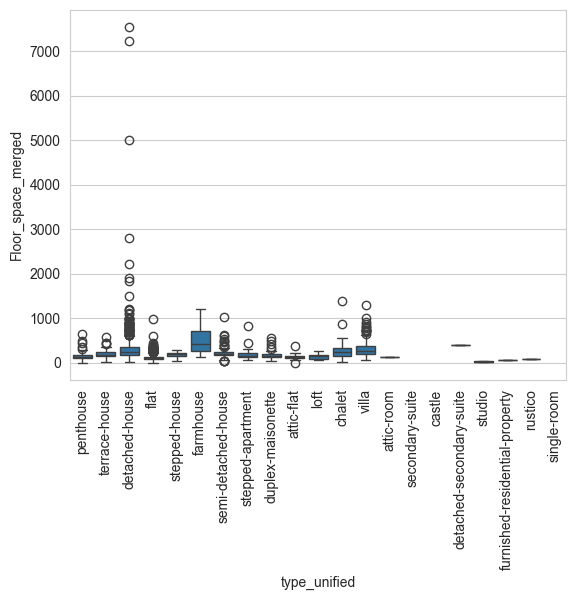

In [52]:
sns.boxplot(data=floor_space, x="type_unified", y="Floor_space_merged")
plt.xticks(rotation=90) 

In [53]:
floor_space["Floor_space_merged"] = floor_space["Floor_space_merged"].fillna(floor_space[["Floor space", "Floor space:"]].mode(axis=1)[0])

In [54]:
floor_space.isna().sum()

Floor space                19706
Floor space:               19721
Floor_space_merged         16884
detail_responsive#floor    22276
Floor                      12530
Floor_unified              17173
Minimum floor space:       22479
space_cleaned              13355
Surface living:            13355
Floor_unified              17173
type                           0
type_unified                   0
dtype: int64

# Visualisierung der Daten mit bereits bereinigten Daten
Es sind nur noch Spalten vorhanden die Denis in EDA_dsa oder hier bereits analysiert wurden.

In [55]:
from src.dataPipeline import DataPipeline

In [88]:
dp = DataPipeline()
dp.readCsv("../data/immo_data_202208_v2.csv")
dp.mergeColumns()
with open('../src/params.yaml', 'r', encoding='utf-8') as file:
    params = yaml.safe_load(file)
dp.dropColumns(params['columns_to_drop_all'])
dp.cleanData()
df_clean = dp.getData()

C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:38: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:61: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in 

In [57]:
df["Floor"] = df["Floor"].astype("category")

In [58]:
df_clean.head()

Availability Floor detail_responsive#surface_usable Gross return  \
0   On request     4                              NaN          NaN   
1   On request   NaN                              NaN          NaN   
2  Immediately     2                              NaN          NaN   
3   On request   NaN                              NaN          NaN   
4   On request     0                              NaN          NaN   

  Floor_space_merged              details        lat       lon  \
0                NaN  3.5 rooms, 100 m²,   47.417100  8.085600   
1                242  4.5 rooms, 156 m²,   47.419500  8.082700   
2                NaN   2.5 rooms, 93 m²,   47.403300  8.033000   
3                257  4.5 rooms, 154 m²,   47.415643  8.085423   
4                NaN  4.5 rooms, 142 m²,   47.403824  8.048288   

   ForestDensityL  ForestDensityM  ...    type_unified  Plot_area_unified  \
0        0.511176        0.286451  ...       penthouse                nan   
1        0.511176        0.286451  ...   terrace-house              222.0   
2        0.163362        0.095877  ...       penthouse                nan   
3        0.511176        0.286451  ...  detached-house              370.0   
4        0.333865        0.279276  ...            flat                nan   

         provider  No. of rooms:  Number of apartments:  Room height:  \
0  Immoscout24.ch            5.0                    NaN           NaN   
1  Immoscout24.ch            5.0                    NaN           NaN   
2  Immoscout24.ch            5.0                    NaN           NaN   
3  Immoscout24.ch            5.0                    NaN           NaN   
4  Immoscout24.ch            5.0                    NaN           NaN   

   Last refurbishment:  Year built:  features  Number of floors:  
0                  NaN          NaN       NaN                NaN  
1                  NaN          NaN       NaN                NaN  
2                  NaN          NaN       NaN                NaN  
3                  NaN          NaN       NaN                NaN  
4                  NaN          NaN       NaN                NaN  

[5 rows x 70 columns]

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20941 entries, 0 to 22480
Data columns (total 70 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Availability                       12088 non-null  object 
 1   Floor                              9714 non-null   object 
 2   detail_responsive#surface_usable   104 non-null    object 
 3   Gross return                       6 non-null      object 
 4   Floor_space_merged                 2600 non-null   object 
 5   details                            11976 non-null  object 
 6   lat                                20941 non-null  float64
 7   lon                                20941 non-null  float64
 8   ForestDensityL                     20941 non-null  float64
 9   ForestDensityM                     20941 non-null  float64
 10  ForestDensityS                     20941 non-null  float64
 11  Latitude                           20941 non-null  float64


In [60]:
df_clean.isna().sum()

Availability                         8853
Floor                               11227
detail_responsive#surface_usable    20837
Gross return                        20935
Floor_space_merged                  18341
                                    ...  
Room height:                        20675
Last refurbishment:                 18711
Year built:                         14216
features                            12881
Number of floors:                   18594
Length: 70, dtype: int64

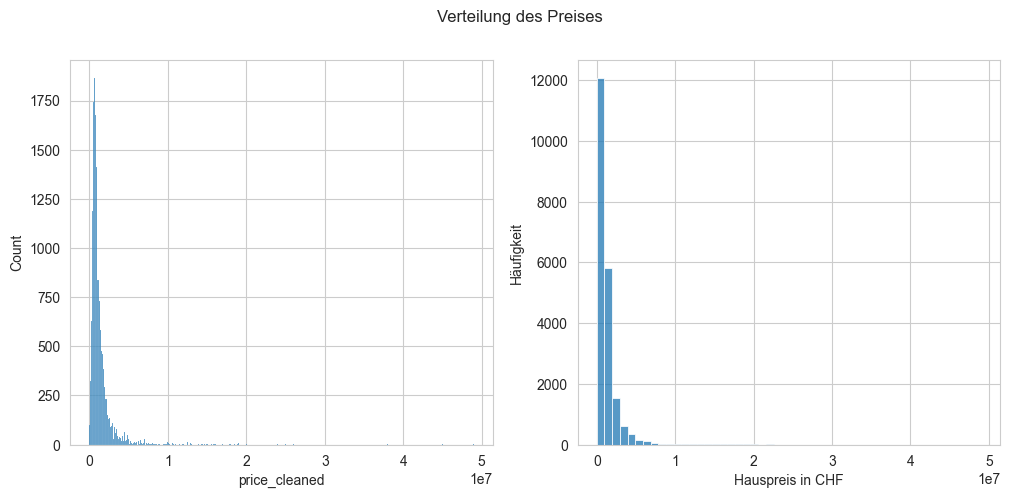

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df_clean, x="price_cleaned", bins=500, ax=ax[0])
plt.xlabel("Hauspreis in CHF")
plt.ylabel("Häufigkeit")
plt.suptitle("Verteilung des Preises")
sns.histplot(data=df_clean, x="price_cleaned", bins=50, ax=ax[1])
plt.xlabel("Hauspreis in CHF")
plt.ylabel("Häufigkeit")
plt.show()

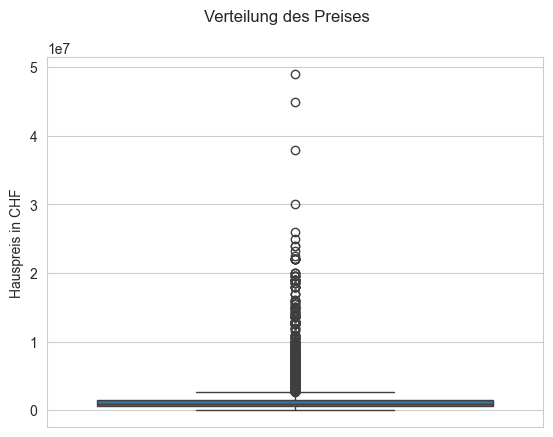

In [62]:
plt.figsize=(7, 7)
plt.suptitle("Verteilung des Preises")
sns.boxplot(data=df_clean, y="price_cleaned")
plt.ylabel("Hauspreis in CHF")
plt.show()

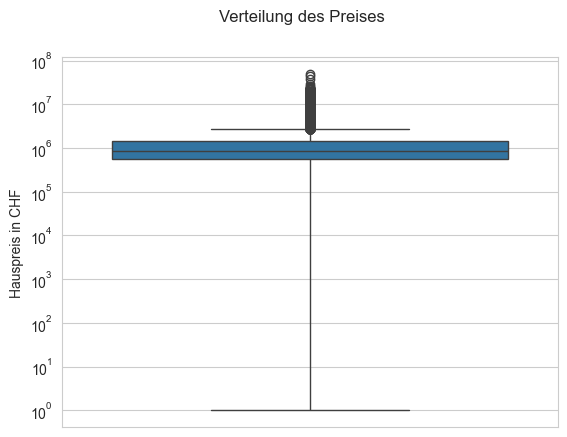

In [63]:
plt.figsize=(7, 7)
plt.suptitle("Verteilung des Preises")
sns.boxplot(data=df_clean, y="price_cleaned")
plt.ylabel("Hauspreis in CHF")
# Apply logarithmic scale to the y-axis
plt.yscale('log')

# Show the plot
plt.show()

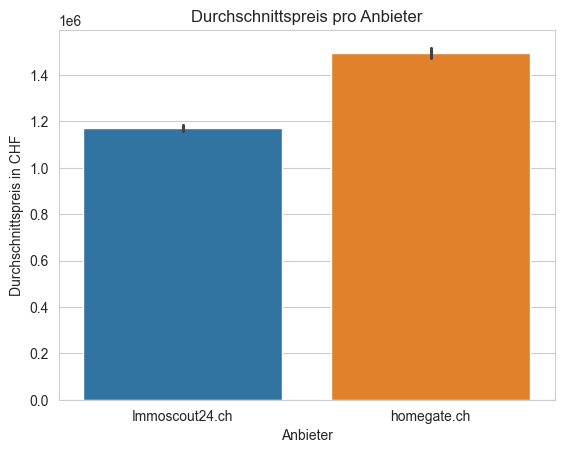

In [64]:
plt.figsize=(7, 7)
sns.barplot(data=df_clean, x="provider", hue="provider",y="price_cleaned",estimator="mean", errorbar="se")
plt.title("Durchschnittspreis pro Anbieter")
plt.xlabel("Anbieter")
plt.ylabel("Durchschnittspreis in CHF")
plt.show()

In [65]:
df_clean["type"].value_counts().sort_values()

type
Hobby room                           1
Granny flat                          1
single-room                          1
Cellar compartment                   1
secondary-suite                      1
Castle                               3
castle                               3
detached-secondary-suite             4
Rustic house                         4
attic-room                           6
Attic                                6
Furnished dwelling                   8
Terrace house                       15
Loft                                15
furnished-residential-property      16
loft                                24
studio                              26
stepped-house                       57
rustico                             60
Farm house                          62
Studio                              66
Terrace flat                        74
farmhouse                           89
Roof flat                          112
stepped-apartment                  130
Multi-family house  

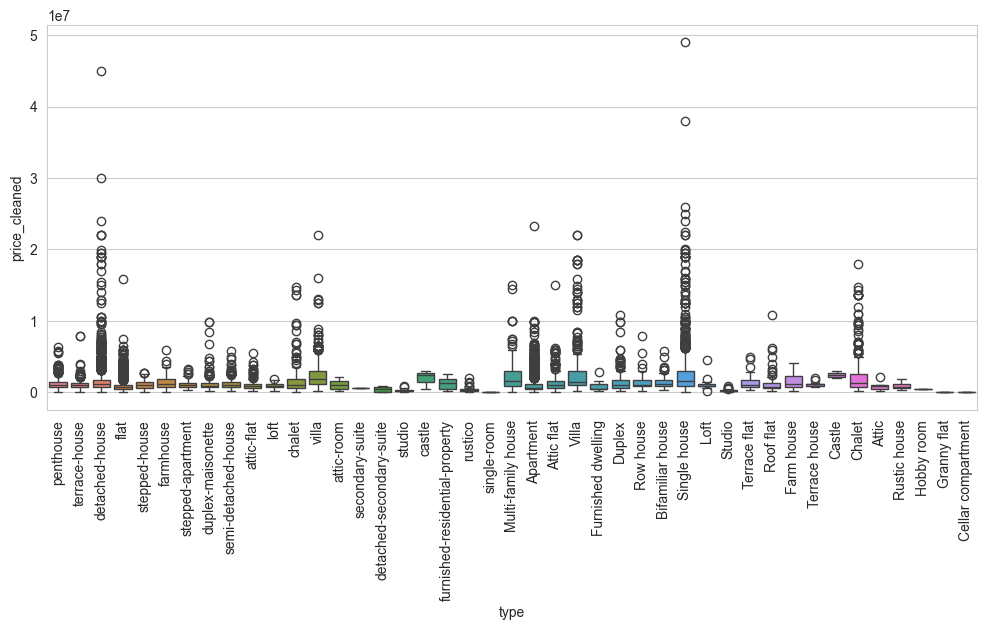

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.boxplot(data=df_clean, x="type", y="price_cleaned",hue="type", ax=ax)
plt.xticks(rotation=90)
plt.show()

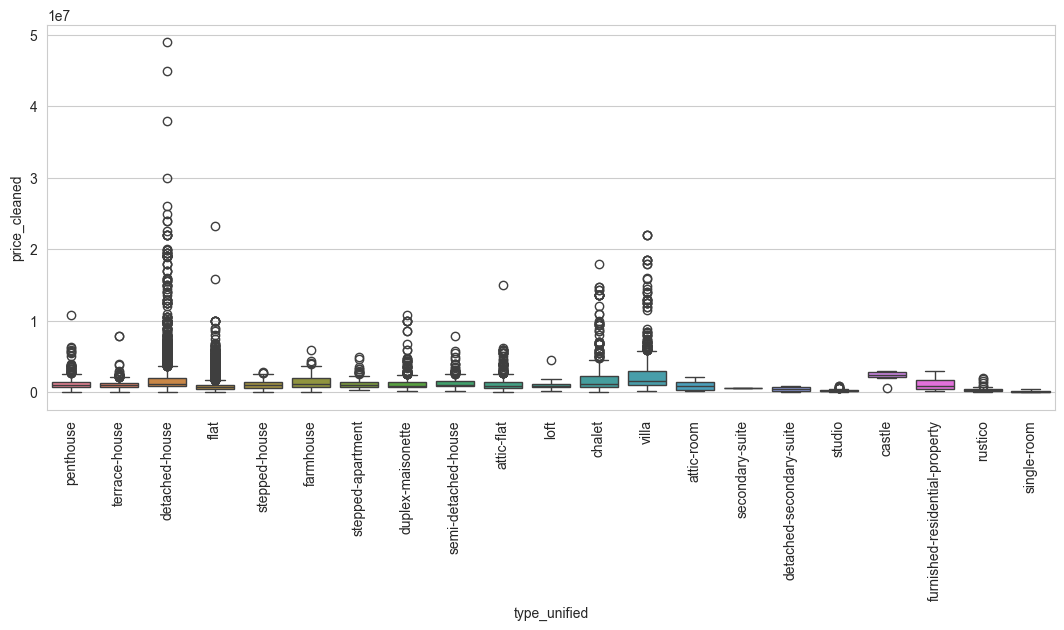

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(13, 5))
sns.boxplot(data=df_clean, x="type_unified", y="price_cleaned",hue="type_unified", ax=ax)
plt.xticks(rotation=90)
plt.show()

In [68]:
df_clean["type_unified"].value_counts().sort_values()


type_unified
secondary-suite                       1
single-room                           3
detached-secondary-suite              4
castle                                6
attic-room                           12
furnished-residential-property       24
loft                                 39
stepped-house                        57
rustico                              64
studio                               92
farmhouse                           151
stepped-apartment                   204
terrace-house                       486
penthouse                           610
attic-flat                          654
chalet                              657
duplex-maisonette                   674
semi-detached-house                 793
villa                              1136
detached-house                     5066
flat                              10208
Name: count, dtype: int64

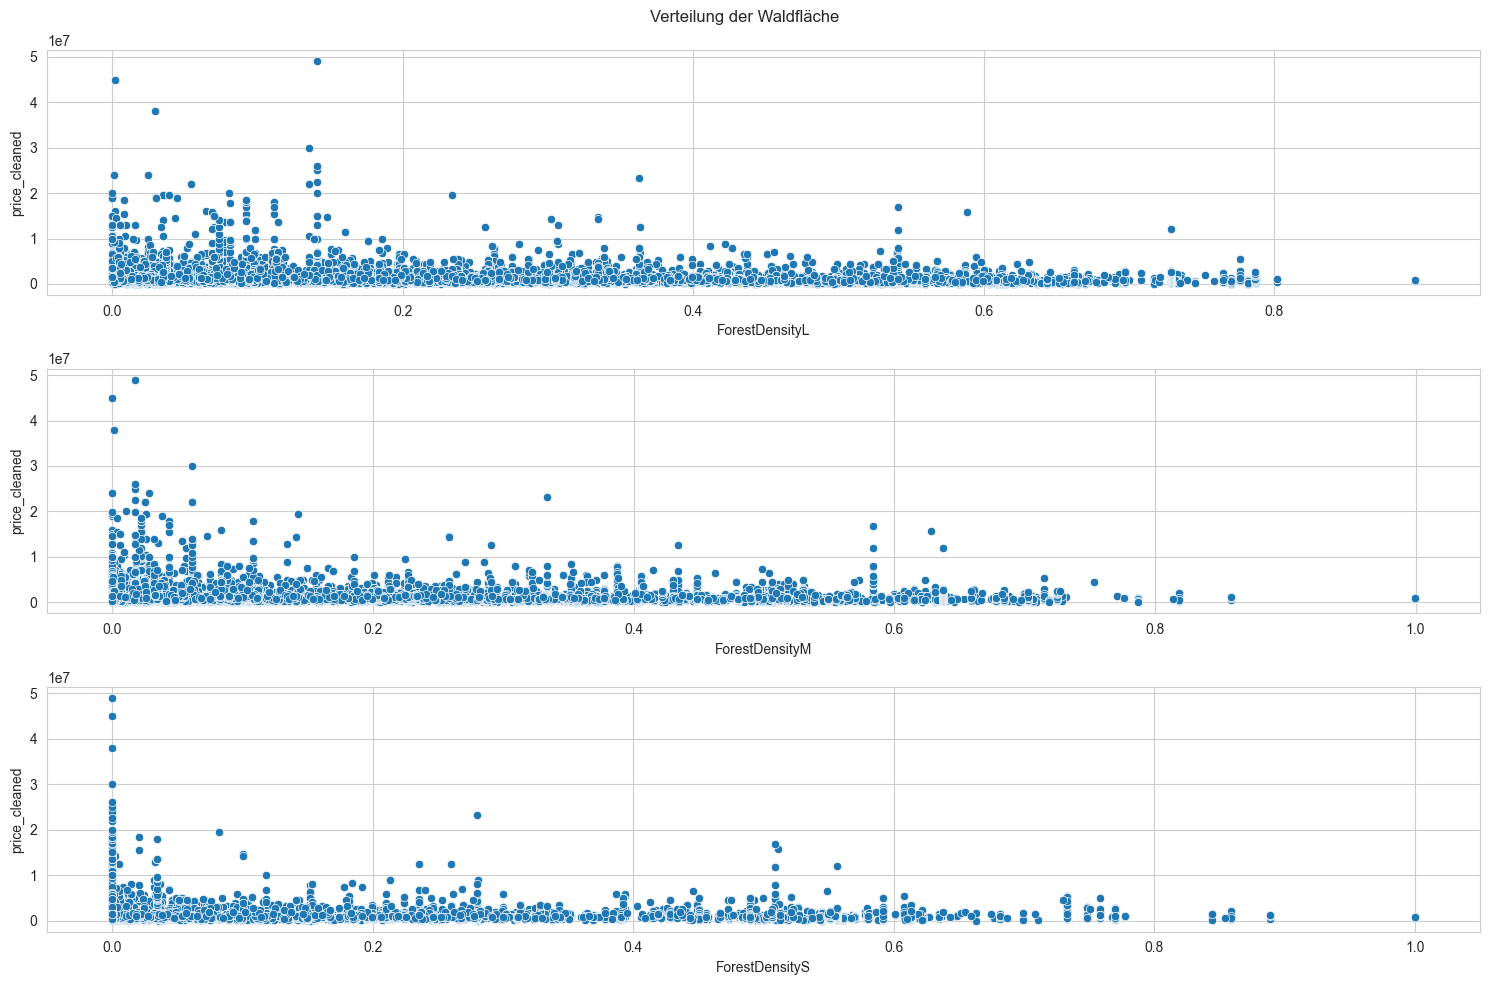

In [69]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Verteilung der Waldfläche")
sns.scatterplot(data=df_clean, x="ForestDensityL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="ForestDensityM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="ForestDensityS", y="price_cleaned", ax=ax[2])
plt.tight_layout()
plt.show()

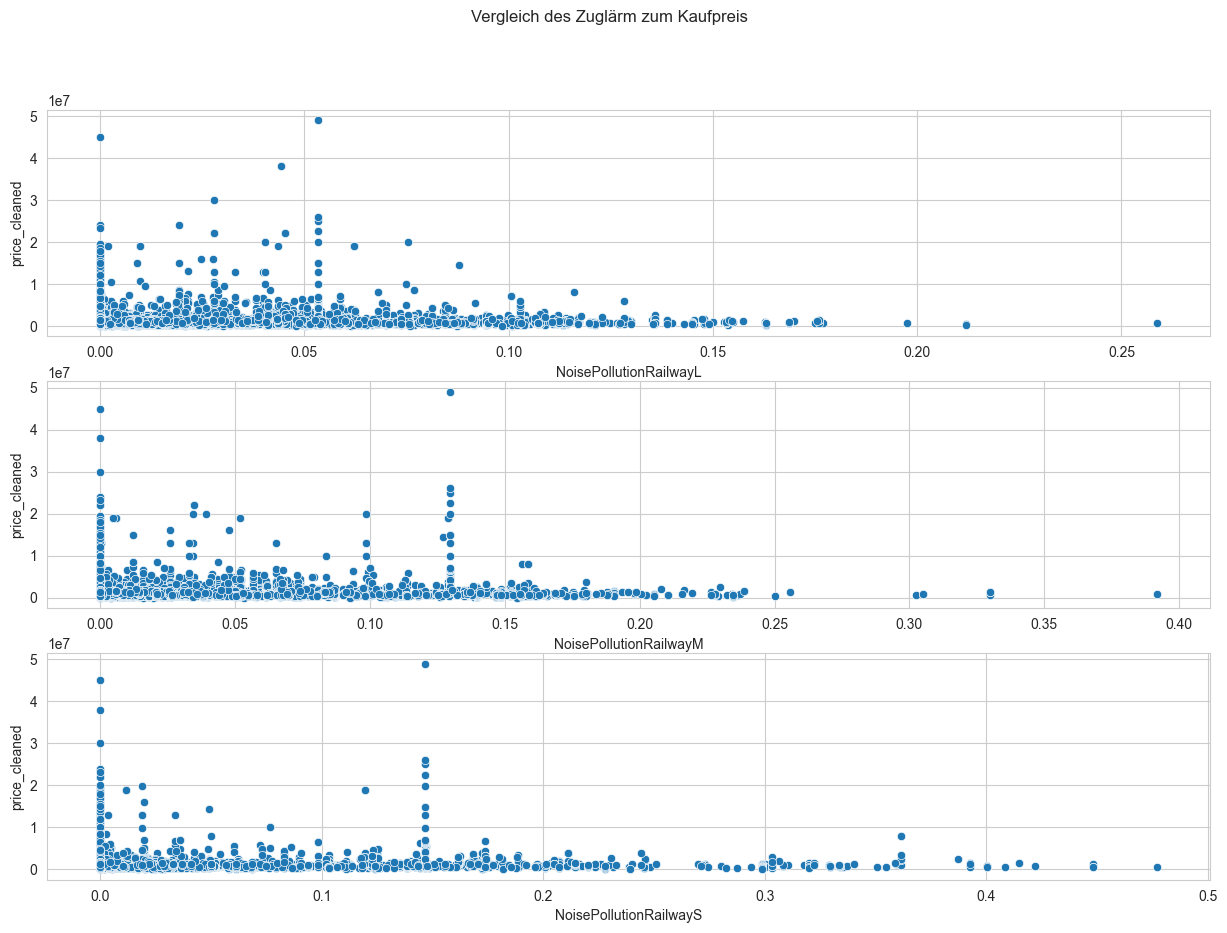

In [70]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich des Zuglärm zum Kaufpreis")
sns.scatterplot(data=df_clean, x="NoisePollutionRailwayL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="NoisePollutionRailwayM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="NoisePollutionRailwayS", y="price_cleaned", ax=ax[2])
plt.show()

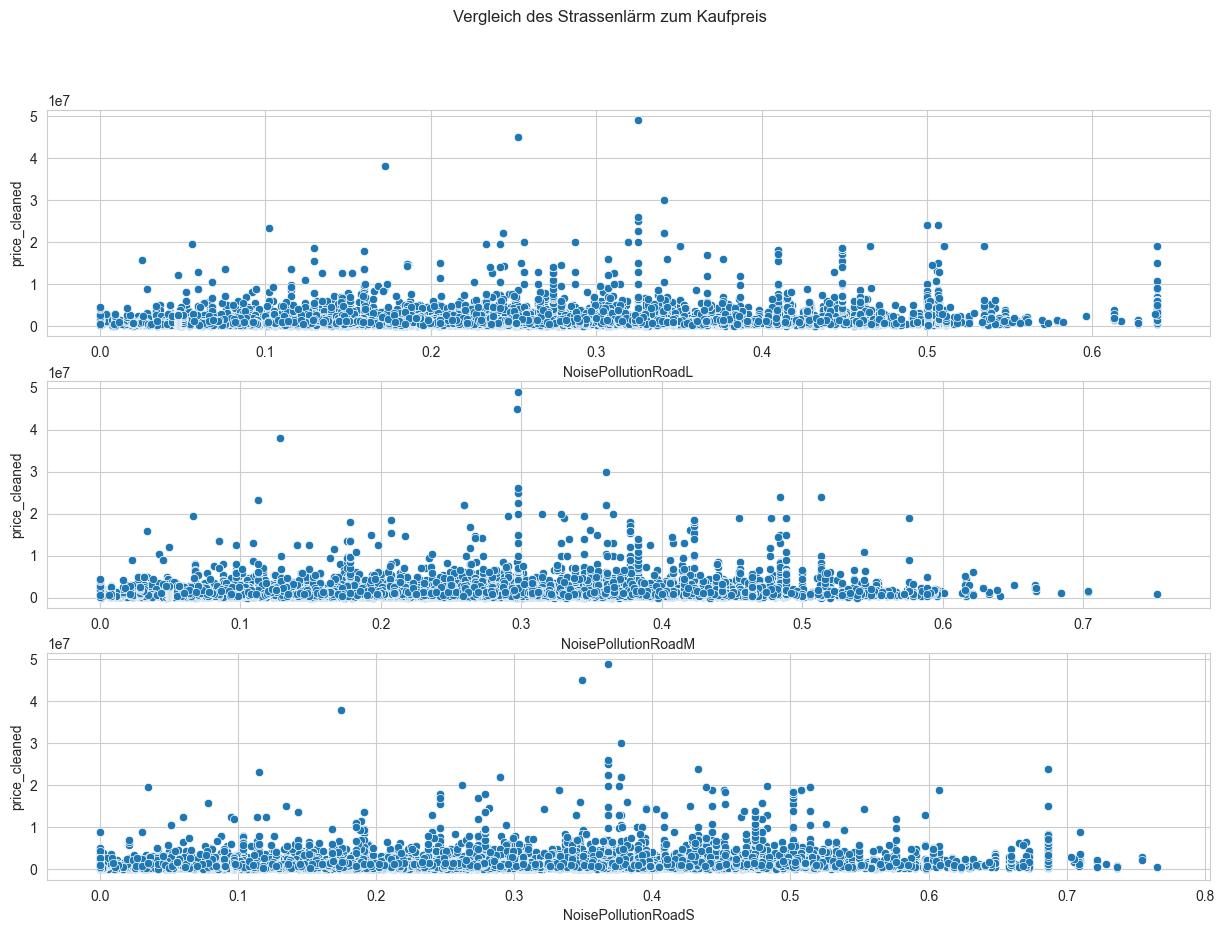

In [71]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich des Strassenlärm zum Kaufpreis")
sns.scatterplot(data=df_clean, x="NoisePollutionRoadL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="NoisePollutionRoadM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="NoisePollutionRoadS", y="price_cleaned", ax=ax[2])
plt.show()

In [72]:
df_clean["Space extracted"] = df_clean["Space extracted"].str.extract(r"(\d+)").astype("float")
df_clean["Plot_area_unified"] = df_clean["Plot_area_unified"].str.extract(r"(\d+)").astype("float")

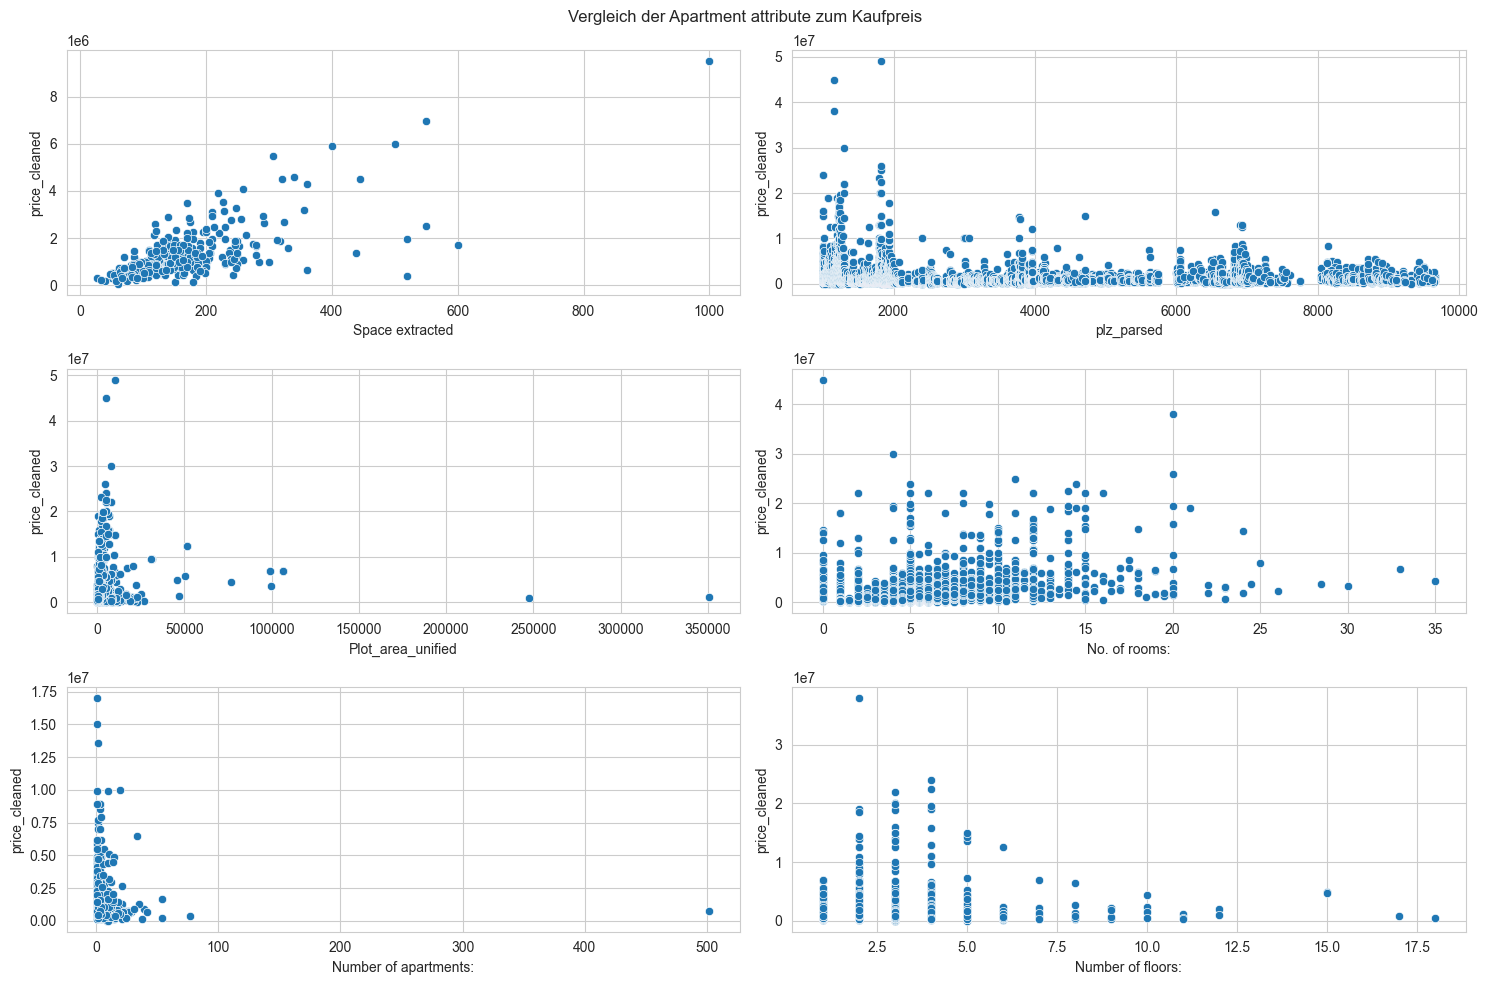

In [73]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
plt.suptitle("Vergleich der Apartment attribute zum Kaufpreis")
sns.scatterplot(data=df_clean, x="Space extracted", y="price_cleaned", ax=ax[0, 0])
sns.scatterplot(data=df_clean, x="plz_parsed", y="price_cleaned", ax=ax[0, 1])
sns.scatterplot(data=df_clean, x="Plot_area_unified", y="price_cleaned", ax=ax[1, 0])
sns.scatterplot(data=df_clean, x="No. of rooms:", y="price_cleaned", ax=ax[1, 1])
sns.scatterplot(data=df_clean, x="Number of apartments:", y="price_cleaned", ax=ax[2, 0])
sns.scatterplot(data=df_clean, x="Number of floors:", y="price_cleaned", ax=ax[2, 1])
plt.tight_layout()
plt.show()

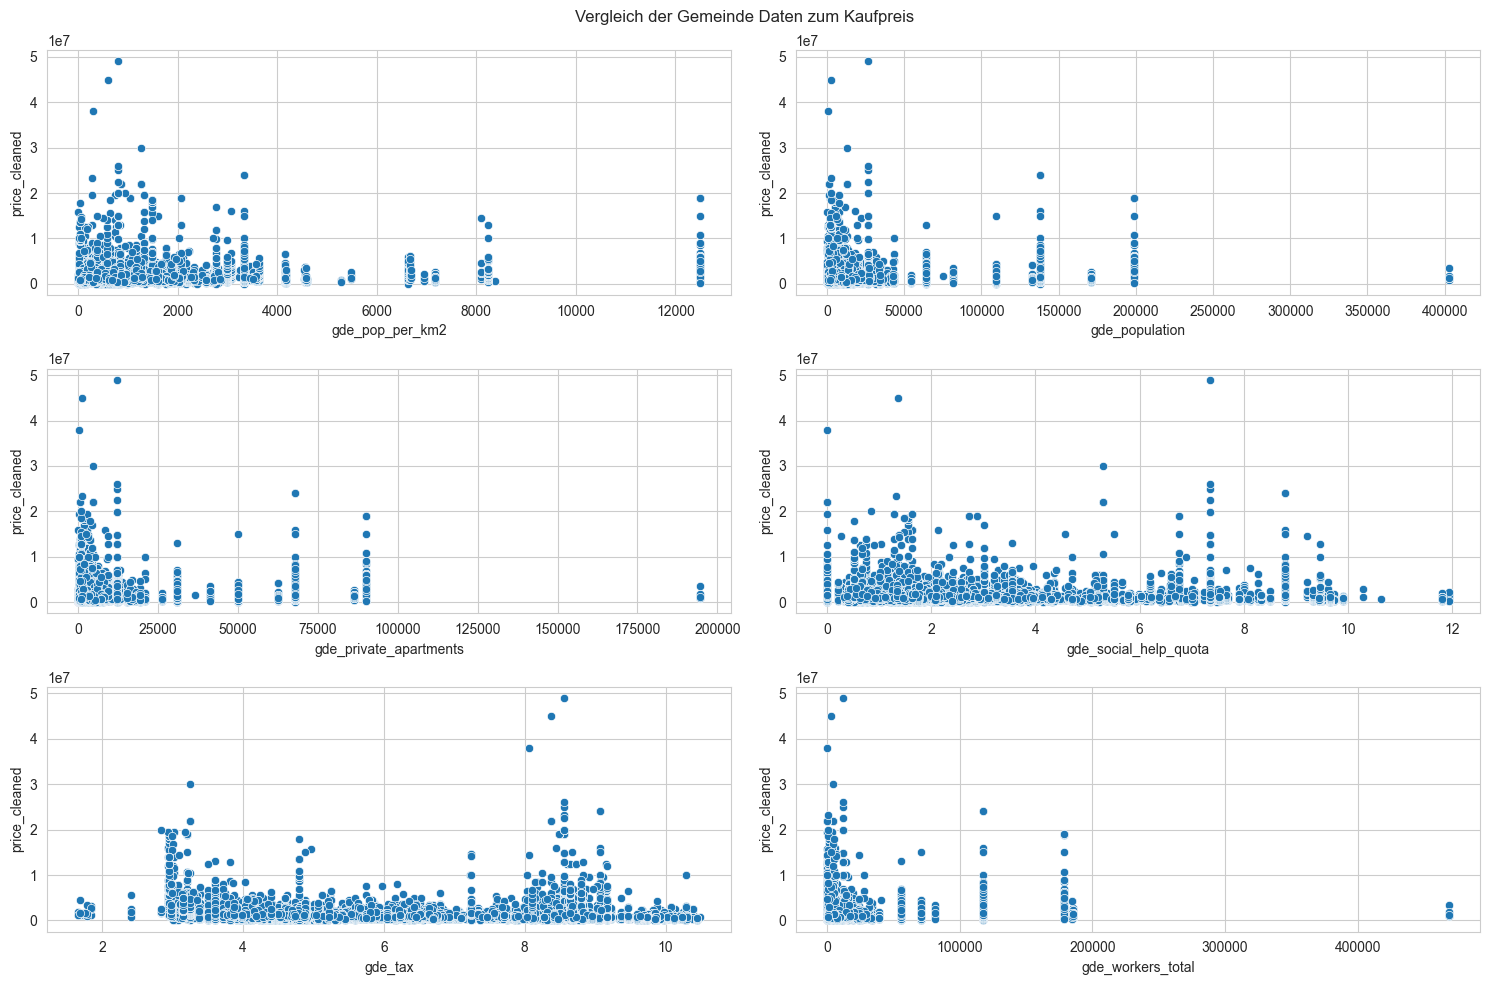

In [74]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
plt.suptitle("Vergleich der Gemeinde Daten zum Kaufpreis")
sns.scatterplot(data=df_clean, x="gde_pop_per_km2", y="price_cleaned", ax=ax[0, 0])
sns.scatterplot(data=df_clean, x="gde_population", y="price_cleaned", ax=ax[0, 1])
sns.scatterplot(data=df_clean, x="gde_private_apartments", y="price_cleaned", ax=ax[1, 0])
sns.scatterplot(data=df_clean, x="gde_social_help_quota", y="price_cleaned", ax=ax[1, 1])
sns.scatterplot(data=df_clean, x="gde_tax", y="price_cleaned", ax=ax[2, 0])
sns.scatterplot(data=df_clean, x="gde_workers_total", y="price_cleaned", ax=ax[2, 1])
plt.tight_layout()
plt.show()

<Axes: xlabel='gde_workers_sector3', ylabel='price_cleaned'>

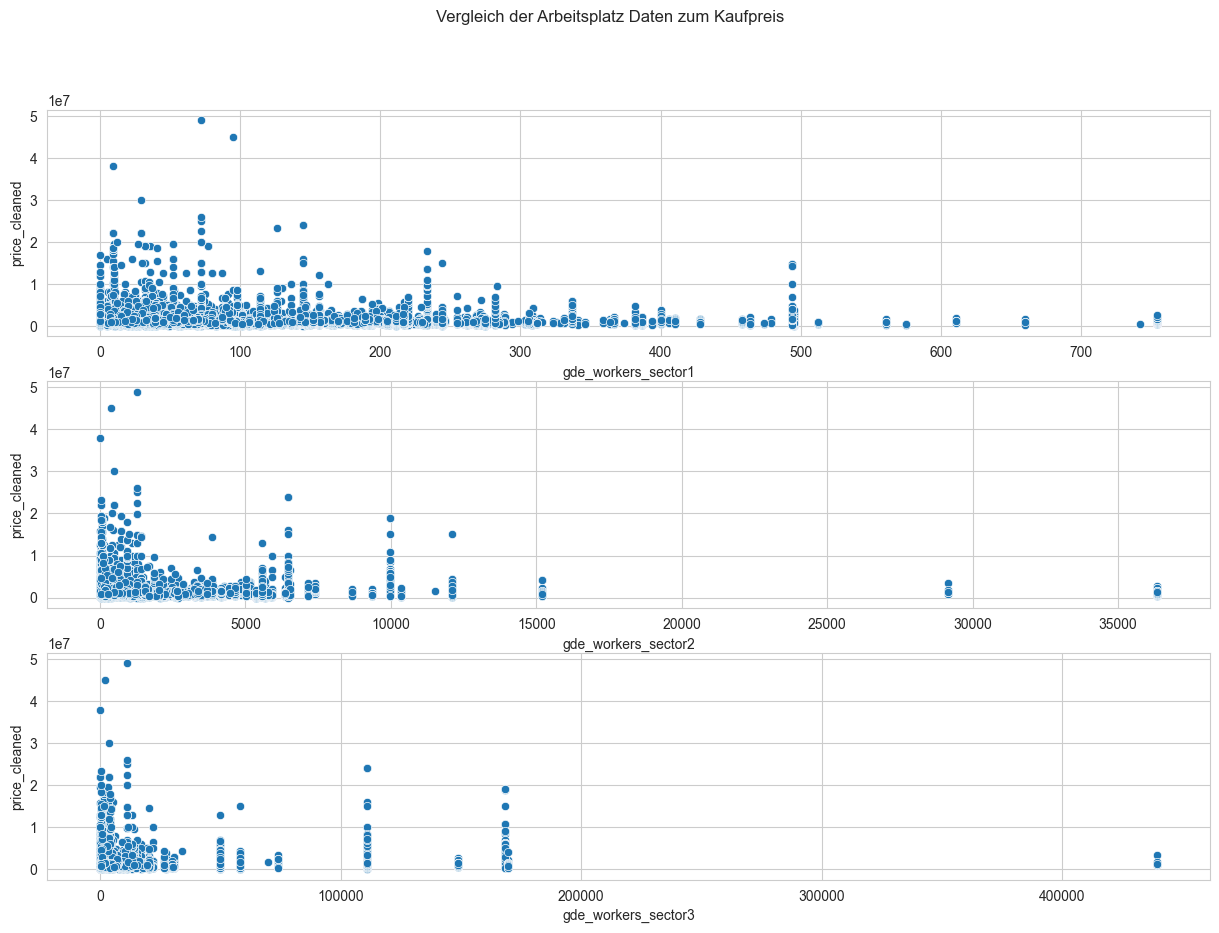

In [75]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich der Arbeitsplatz Daten zum Kaufpreis")
sns.scatterplot(data=df_clean, x="gde_workers_sector1", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="gde_workers_sector2", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="gde_workers_sector3", y="price_cleaned", ax=ax[2])

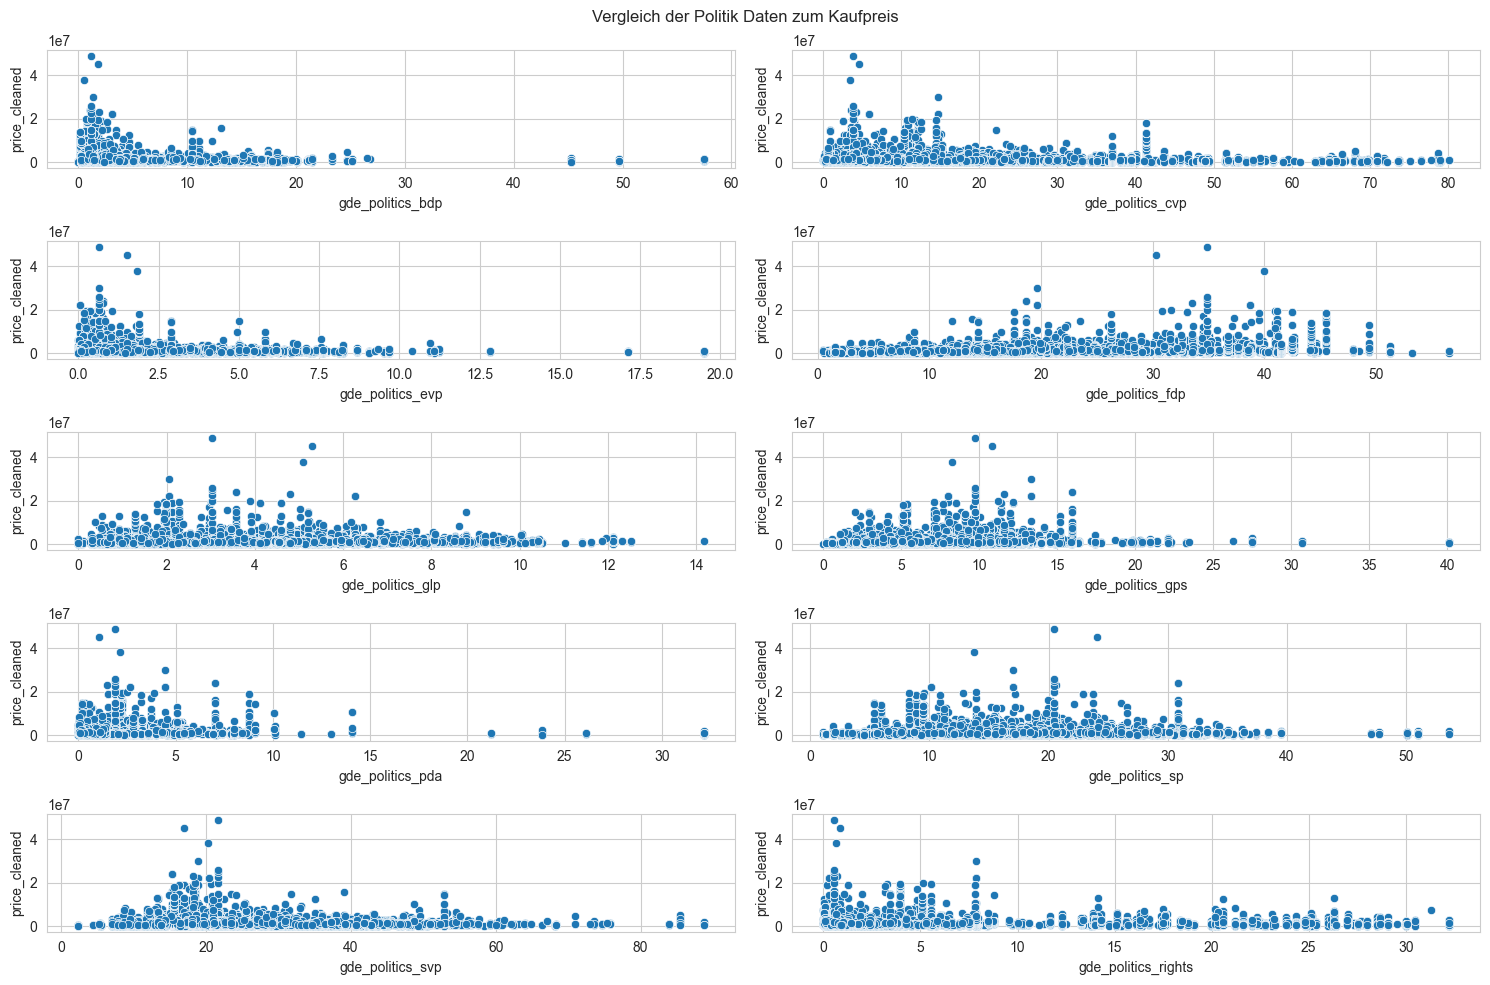

In [76]:
fig, ax = plt.subplots(5, 2, figsize=(15, 10))
plt.suptitle("Vergleich der Politik Daten zum Kaufpreis")
sns.scatterplot(data=df_clean, x="gde_politics_bdp", y="price_cleaned", ax=ax[0, 0])
sns.scatterplot(data=df_clean, x="gde_politics_cvp", y="price_cleaned", ax=ax[0, 1])
sns.scatterplot(data=df_clean, x="gde_politics_evp", y="price_cleaned", ax=ax[1, 0])
sns.scatterplot(data=df_clean, x="gde_politics_fdp", y="price_cleaned", ax=ax[1, 1])
sns.scatterplot(data=df_clean, x="gde_politics_glp", y="price_cleaned", ax=ax[2, 0])
sns.scatterplot(data=df_clean, x="gde_politics_gps", y="price_cleaned", ax=ax[2, 1])
sns.scatterplot(data=df_clean, x="gde_politics_pda", y="price_cleaned", ax=ax[3, 0])
sns.scatterplot(data=df_clean, x="gde_politics_sp", y="price_cleaned", ax=ax[3, 1])
sns.scatterplot(data=df_clean, x="gde_politics_svp", y="price_cleaned", ax=ax[4, 0])
sns.scatterplot(data=df_clean, x="gde_politics_rights", y="price_cleaned", ax=ax[4, 1])
plt.tight_layout()
plt.show()

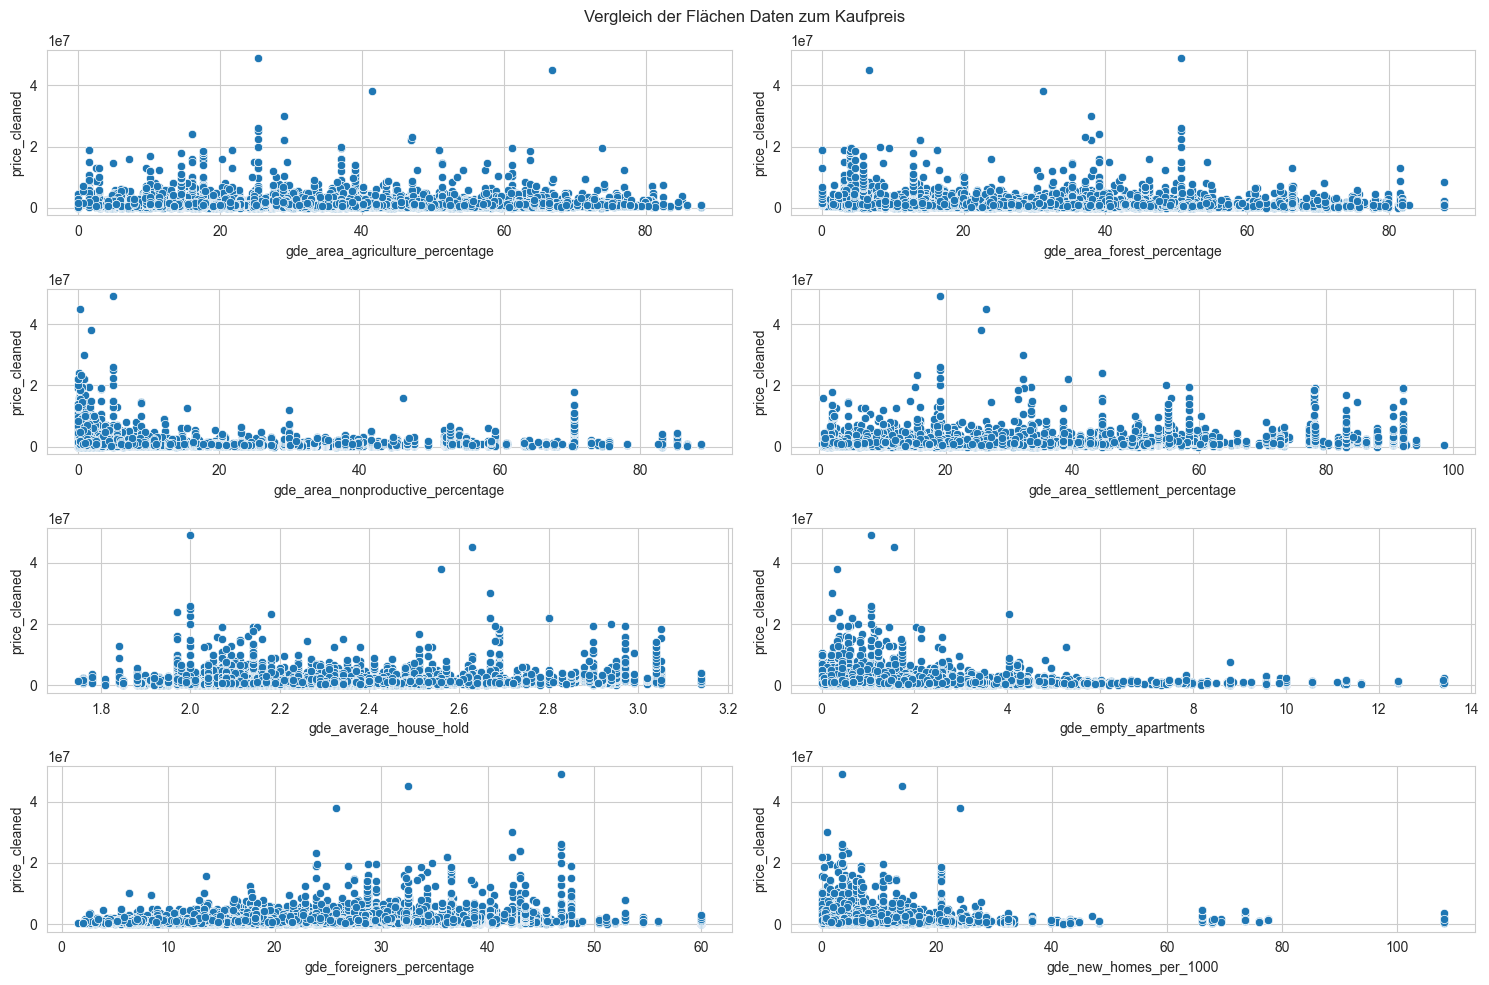

In [77]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))
plt.suptitle("Vergleich der Flächen Daten zum Kaufpreis")
sns.scatterplot(data=df_clean, x="gde_area_agriculture_percentage", y="price_cleaned", ax=ax[0, 0])
sns.scatterplot(data=df_clean, x="gde_area_forest_percentage", y="price_cleaned", ax=ax[0, 1])
sns.scatterplot(data=df_clean, x="gde_area_nonproductive_percentage", y="price_cleaned", ax=ax[1, 0])
sns.scatterplot(data=df_clean, x="gde_area_settlement_percentage", y="price_cleaned", ax=ax[1, 1])
sns.scatterplot(data=df_clean, x="gde_average_house_hold", y="price_cleaned", ax=ax[2, 0])
sns.scatterplot(data=df_clean, x="gde_empty_apartments", y="price_cleaned", ax=ax[2, 1])
sns.scatterplot(data=df_clean, x="gde_foreigners_percentage", y="price_cleaned", ax=ax[3, 0])
sns.scatterplot(data=df_clean, x="gde_new_homes_per_1000", y="price_cleaned", ax=ax[3, 1])
plt.tight_layout()
plt.show()

<Axes: xlabel='distanceToTrainStation', ylabel='price_cleaned'>

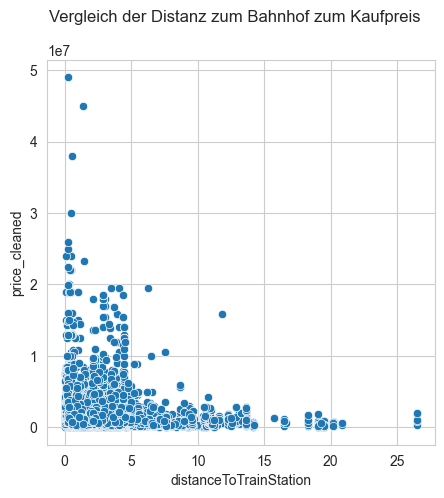

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.suptitle("Vergleich der Distanz zum Bahnhof zum Kaufpreis")
sns.scatterplot(data=df_clean, x="distanceToTrainStation", y="price_cleaned")

<Axes: xlabel='WorkplaceDensityS', ylabel='price_cleaned'>

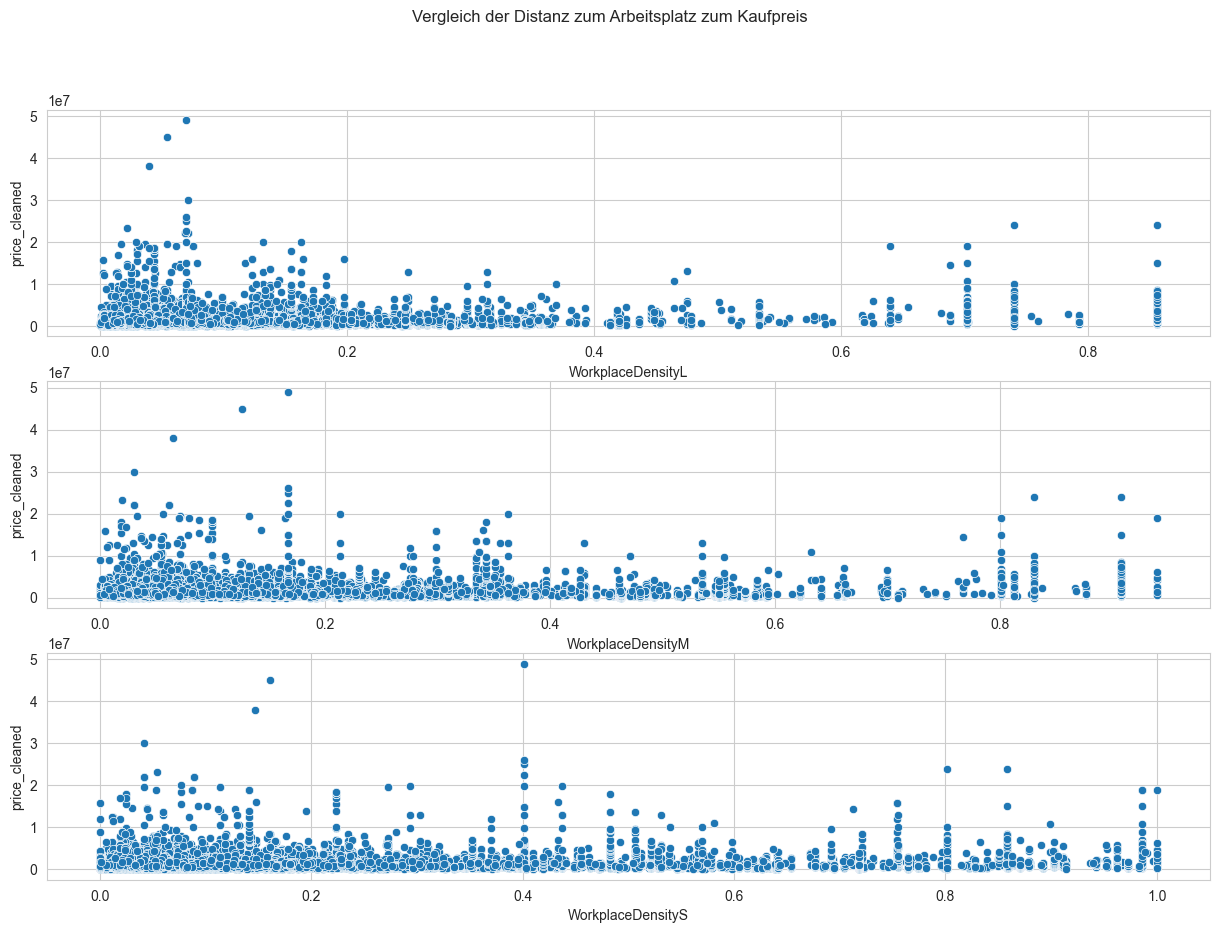

In [79]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich der Distanz zum Arbeitsplatz zum Kaufpreis")
sns.scatterplot(data=df_clean, x="WorkplaceDensityL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="WorkplaceDensityM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="WorkplaceDensityS", y="price_cleaned", ax=ax[2])

<Axes: xlabel='RiversAndLakesS', ylabel='price_cleaned'>

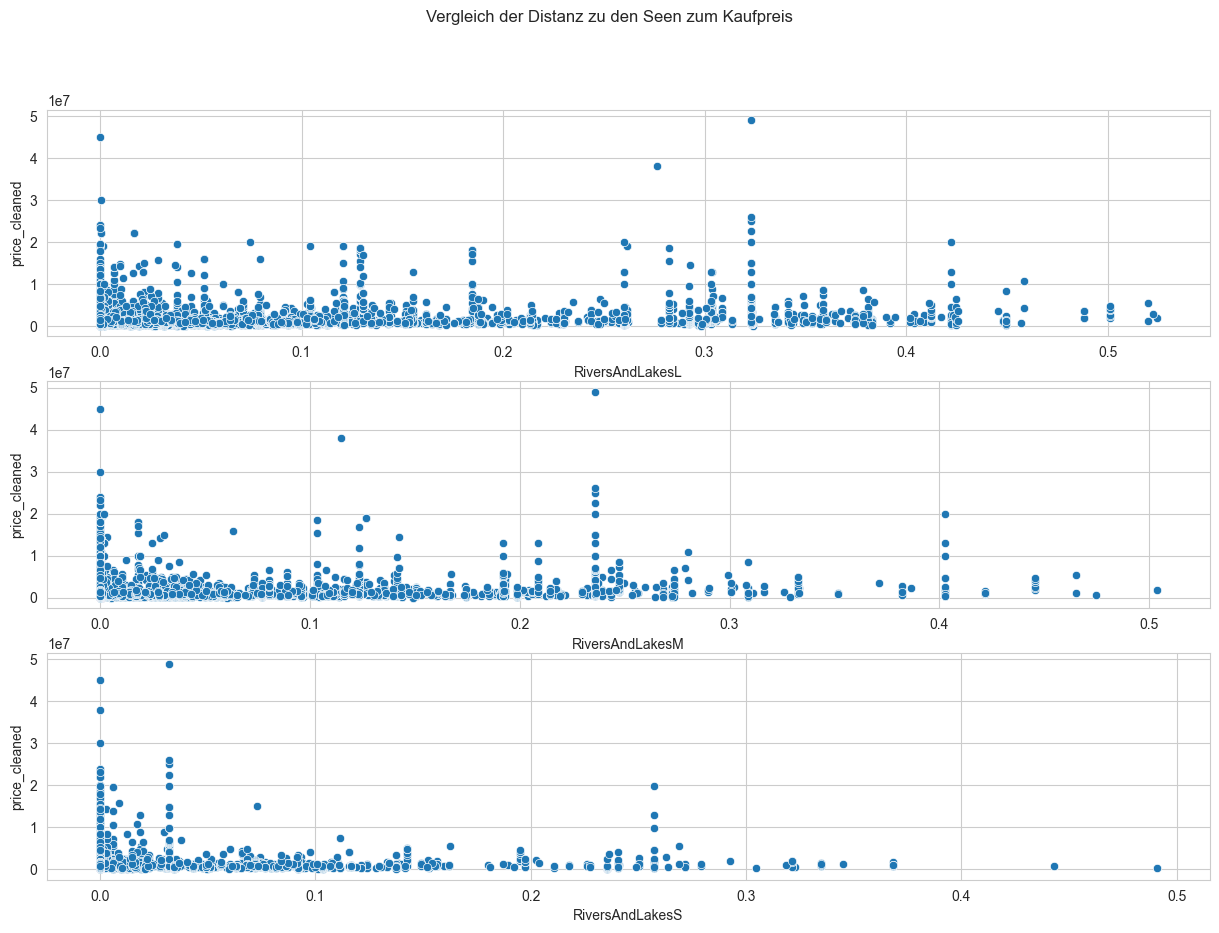

In [80]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich der Distanz zu den Seen zum Kaufpreis")
sns.scatterplot(data=df_clean, x="RiversAndLakesL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="RiversAndLakesM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="RiversAndLakesS", y="price_cleaned", ax=ax[2])

<Axes: xlabel='PopulationDensityS', ylabel='price_cleaned'>

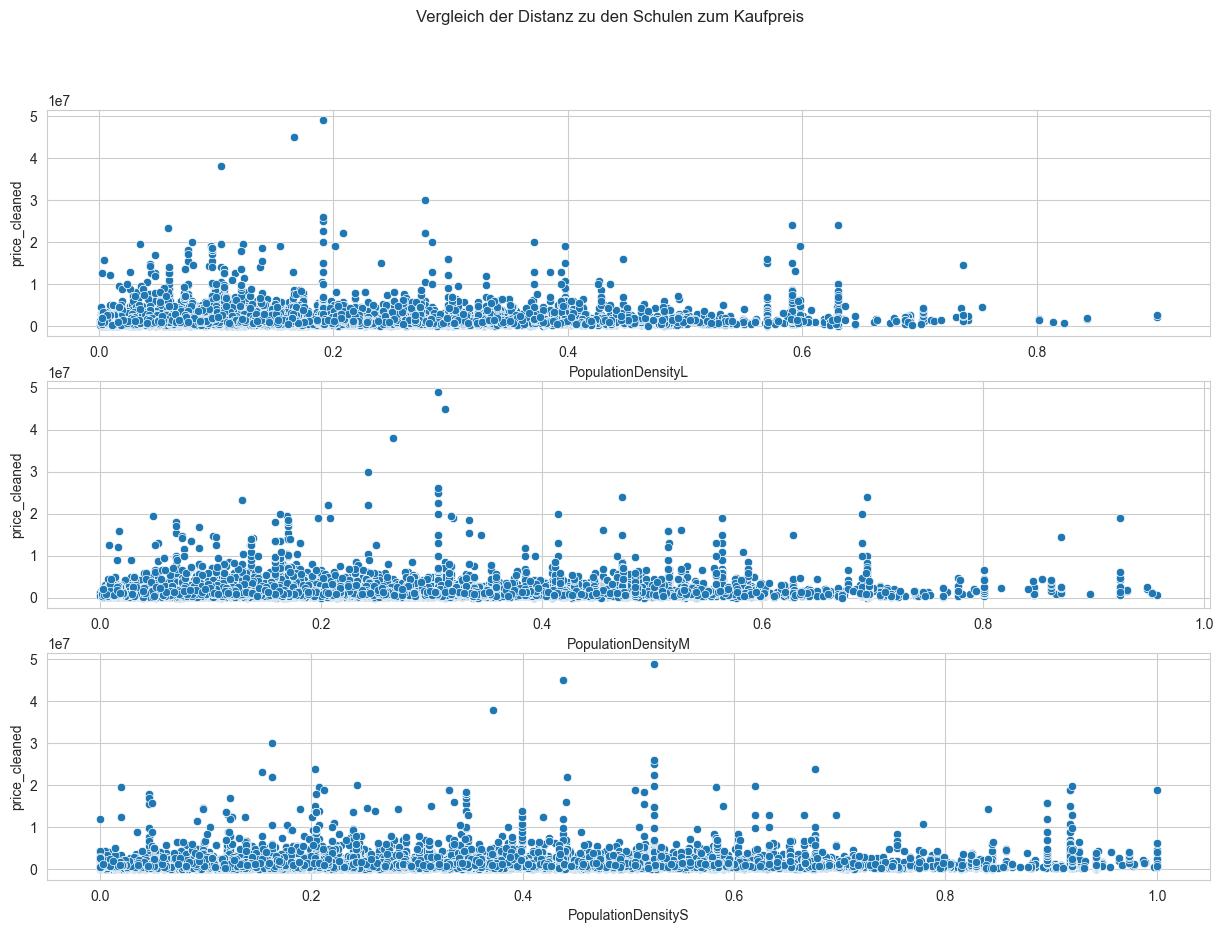

In [81]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich der Distanz zu den Schulen zum Kaufpreis")
sns.scatterplot(data=df_clean, x="PopulationDensityL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="PopulationDensityM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="PopulationDensityS", y="price_cleaned", ax=ax[2])

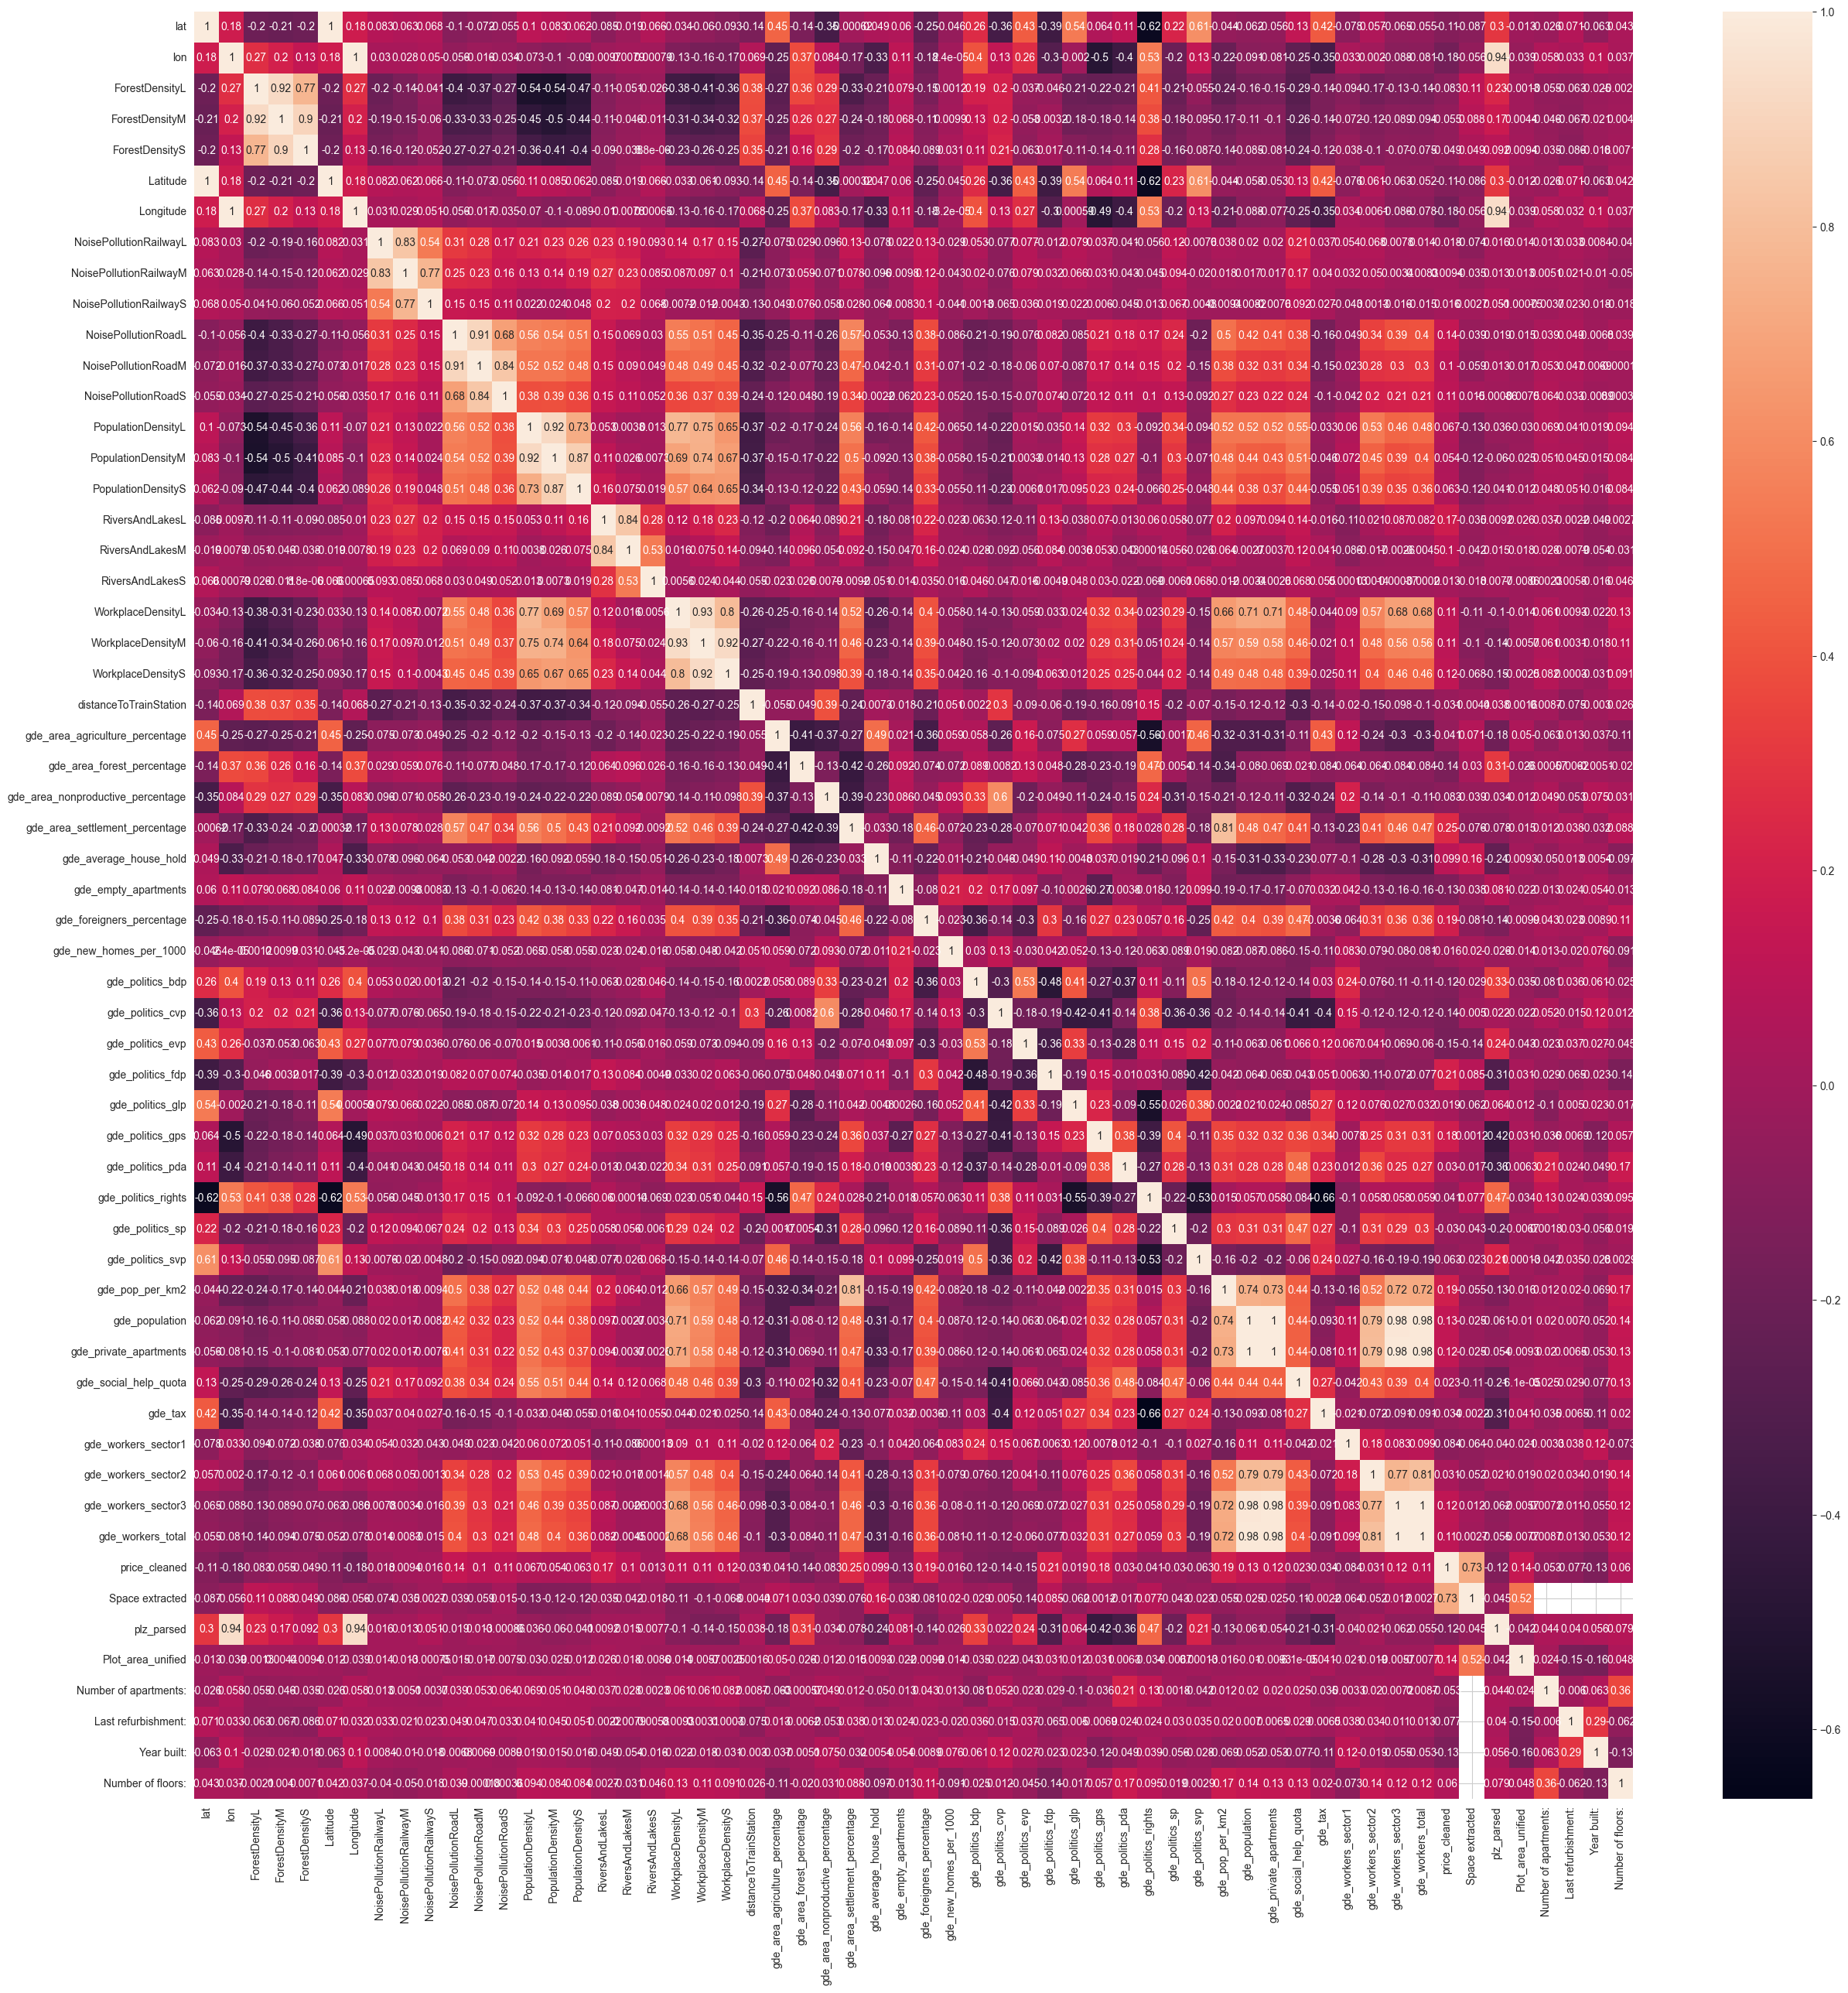

In [87]:
corr_matrix = df_clean.corr(numeric_only=True)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True)
plt.show()